# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline

# Load Data

In [3]:
current_dir = Path('.').resolve()

In [4]:
file_path = current_dir / 'data/daily-total-female-births-CA.csv'

In [5]:
df = pd.read_csv(file_path)

In [6]:
df.head()

date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
df['date'].dtype

dtype('O')

For future data analysis, we want the **'date' column** as **date** and **not string**.

In [9]:
df = pd.read_csv(file_path, parse_dates=[0])

In [10]:
df.head()

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [12]:
df['date'].dtype

dtype('<M8[ns]')

**Note**

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

# Load Data as Series

In [13]:
# squeeze=True, changes the dataframe to a series
s = pd.read_csv(file_path, parse_dates=[0], index_col=0, squeeze=True)

/tmp/ipykernel_5391/799641079.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv(file_path, parse_dates=[0], index_col=0, squeeze=True)


In [14]:
s.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

# Exploring Time Series Data

## Size

In [15]:
s.shape

(365,)

In [16]:
df.shape

(365, 2)

## Quering by Time

This the advantage of using date and not string.

### Series

In [17]:
s['1959-09']

date
1959-09-01    38
1959-09-02    68
1959-09-03    40
1959-09-04    42
1959-09-05    51
1959-09-06    44
1959-09-07    45
1959-09-08    36
1959-09-09    57
1959-09-10    44
1959-09-11    42
1959-09-12    53
1959-09-13    42
1959-09-14    34
1959-09-15    40
1959-09-16    56
1959-09-17    44
1959-09-18    53
1959-09-19    55
1959-09-20    39
1959-09-21    59
1959-09-22    55
1959-09-23    73
1959-09-24    55
1959-09-25    44
1959-09-26    43
1959-09-27    40
1959-09-28    47
1959-09-29    51
1959-09-30    56
Name: births, dtype: int64

### Dataframe

In [18]:
df[(df['date'] > '1959-01-01') & (df['date'] <= '1959-01-21')]

date  births
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44
5  1959-01-06      29
6  1959-01-07      45
7  1959-01-08      43
8  1959-01-09      38
9  1959-01-10      27
10 1959-01-11      38
11 1959-01-12      33
12 1959-01-13      55
13 1959-01-14      47
14 1959-01-15      45
15 1959-01-16      37
16 1959-01-17      50
17 1959-01-18      43
18 1959-01-19      41
19 1959-01-20      52
20 1959-01-21      34

In case of **series**, you can just write the **month value** but for **dataframe** you have to mention the **range** of dates between which you want the data.

## Descriptive Statistics

In [19]:
s.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [20]:
df.describe()

births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000

# Time Series Visualization

In [36]:
vz = df.copy()

In [37]:
vz.head()

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44

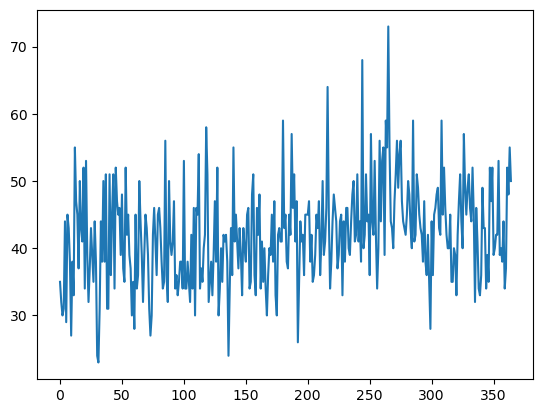

In [38]:
vz['births'].plot() #x-axis: index, y-axis: births
plt.show()

In [39]:
vz.index = vz['date']

In [40]:
vz.head()

date  births
date                         
1959-01-01 1959-01-01      35
1959-01-02 1959-01-02      32
1959-01-03 1959-01-03      30
1959-01-04 1959-01-04      31
1959-01-05 1959-01-05      44

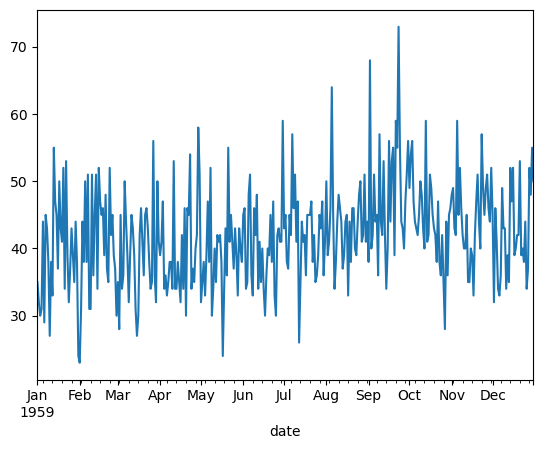

In [41]:
vz['births'].plot()
plt.show()

## Zooming In

In [42]:
vz2 = vz[(vz['date'] > '1959-01-01') & (vz['date'] <= '1959-01-10')].copy()

In [43]:
vz2.head()

date  births
date                         
1959-01-02 1959-01-02      32
1959-01-03 1959-01-03      30
1959-01-04 1959-01-04      31
1959-01-05 1959-01-05      44
1959-01-06 1959-01-06      29

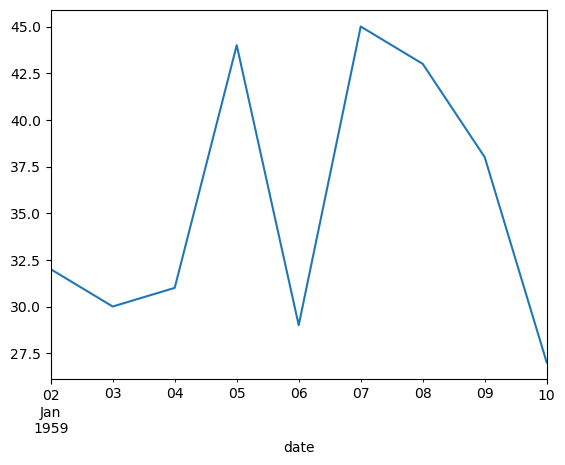

In [44]:
vz2['births'].plot()
plt.show()

## Trendline

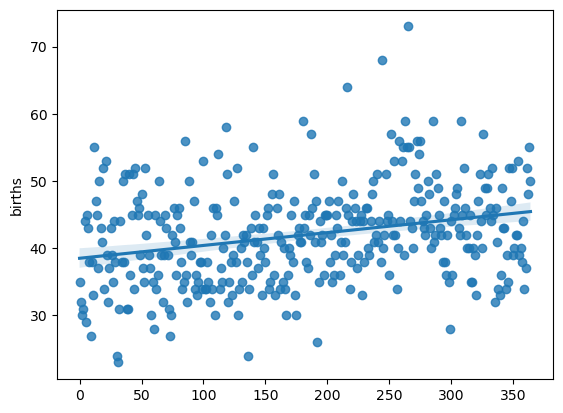

In [45]:
sns.regplot(x=df.index.values, y=df['births'])
plt.show()

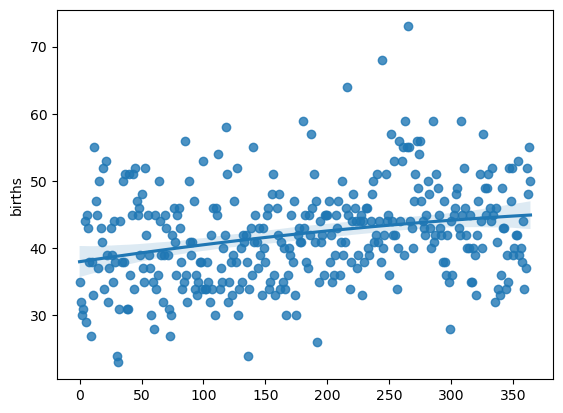

In [46]:
sns.regplot(x=df.index.values, y=df['births'], order=2)
plt.show()

In [47]:
miles_df = pd.read_csv('./data/us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [48]:
miles_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

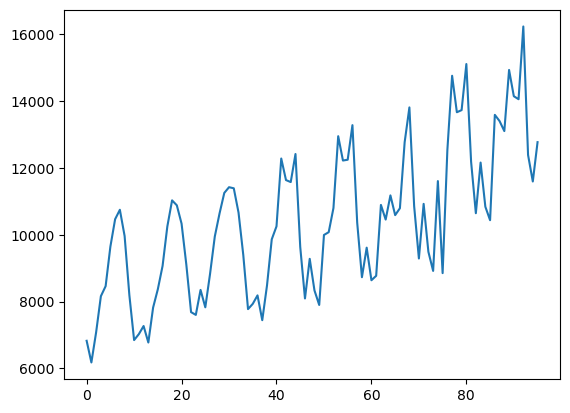

In [49]:
miles_df['MilesMM'].plot()
plt.show()

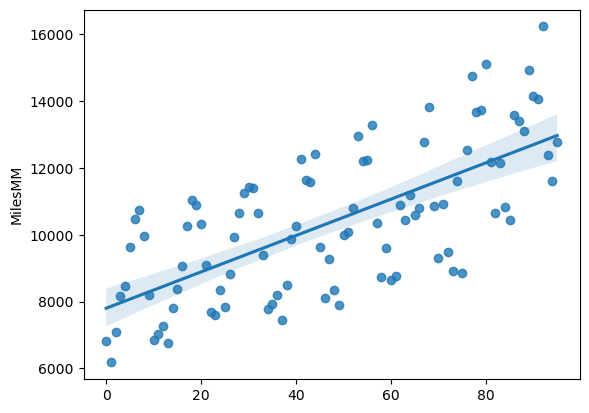

In [50]:
sns.regplot(x=miles_df.index.values, y=miles_df['MilesMM'])
plt.show()

## Removing Seasonality

In [51]:
miles_df['year'] = miles_df['Month'].dt.year

In [52]:
miles_df.head()

Month  MilesMM  year
0 1963-01-01     6827  1963
1 1963-02-01     6178  1963
2 1963-03-01     7084  1963
3 1963-04-01     8162  1963
4 1963-05-01     8462  1963

In [53]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

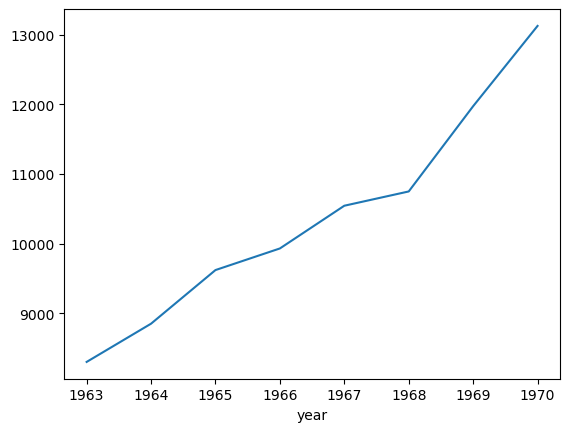

In [54]:
miles_df.groupby('year')['MilesMM'].mean().plot()
plt.show()

## Creating Lag Plots

In [55]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [56]:
miles_df.head()

Month  MilesMM  year    lag1
0 1963-01-01     6827  1963     NaN
1 1963-02-01     6178  1963  6827.0
2 1963-03-01     7084  1963  6178.0
3 1963-04-01     8162  1963  7084.0
4 1963-05-01     8462  1963  8162.0

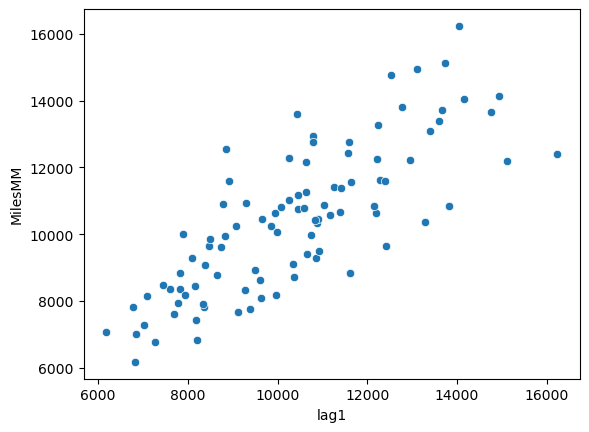

In [57]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])
plt.show()

In [58]:
from pandas.plotting import lag_plot

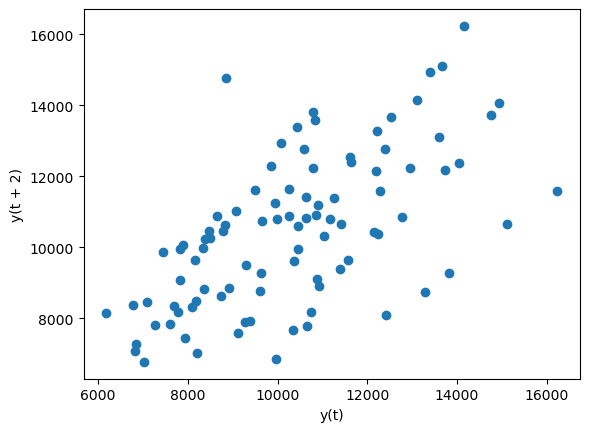

In [59]:
lag_plot(miles_df['MilesMM'], lag=2)
plt.show()

## Autocorrelation Plots

In [60]:
from pandas.plotting import autocorrelation_plot

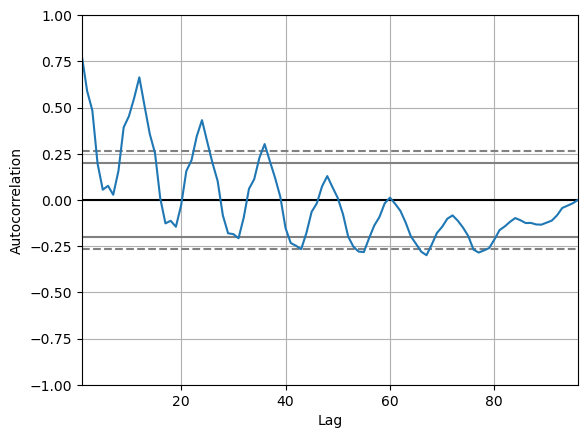

In [61]:
autocorrelation_plot(miles_df['MilesMM'])
plt.show()

- This graph tells us about the correlation between the value and the lagged value. 
- We have a very high correlation for initial 2-4 values (> 0.5).
- For the first three periods, the lag values are highly correlated with the MilesMM value.
- We have a depth every 6 months, this is because of seasonality.

# Resampling

Do we need to resample the data?

# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature

## Date Time Features

In [21]:
df.head()

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44

In [22]:
feature = df.copy()

In [23]:
feature['year'] = df['date'].dt.year

In [24]:
feature['month'] = df['date'].dt.month

In [25]:
feature['day'] = df['date'].dt.day

In [26]:
feature.head()

date  births  year  month  day
0 1959-01-01      35  1959      1    1
1 1959-01-02      32  1959      1    2
2 1959-01-03      30  1959      1    3
3 1959-01-04      31  1959      1    4
4 1959-01-05      44  1959      1    5

For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

## Lag Features

In [27]:
feature['lag1'] = df['births'].shift(1)

In [28]:
feature['lag2'] = df['births'].shift(365)

In [29]:
feature.head()

date  births  year  month  day  lag1  lag2
0 1959-01-01      35  1959      1    1   NaN   NaN
1 1959-01-02      32  1959      1    2  35.0   NaN
2 1959-01-03      30  1959      1    3  32.0   NaN
3 1959-01-04      31  1959      1    4  30.0   NaN
4 1959-01-05      44  1959      1    5  31.0   NaN

For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

## Window Features

In [30]:
feature['Roll_mean'] = df['births'].rolling(window=2).mean()

In [31]:
feature.head()

date  births  year  month  day  lag1  lag2  Roll_mean
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN
1 1959-01-02      32  1959      1    2  35.0   NaN       33.5
2 1959-01-03      30  1959      1    3  32.0   NaN       31.0
3 1959-01-04      31  1959      1    4  30.0   NaN       30.5
4 1959-01-05      44  1959      1    5  31.0   NaN       37.5

In [32]:
feature['Roll_max'] = df['births'].rolling(window=3).max()

In [33]:
feature.head()

date  births  year  month  day  lag1  lag2  Roll_mean  Roll_max
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN       NaN
1 1959-01-02      32  1959      1    2  35.0   NaN       33.5       NaN
2 1959-01-03      30  1959      1    3  32.0   NaN       31.0      35.0
3 1959-01-04      31  1959      1    4  30.0   NaN       30.5      32.0
4 1959-01-05      44  1959      1    5  31.0   NaN       37.5      44.0

For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

## Expanding Features

In [34]:
feature['Expand_max'] = df['births'].expanding().max()

In [35]:
feature.head()

date  births  year  month  day  lag1  lag2  Roll_mean  Roll_max  \
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN       NaN   
1 1959-01-02      32  1959      1    2  35.0   NaN       33.5       NaN   
2 1959-01-03      30  1959      1    3  32.0   NaN       31.0      35.0   
3 1959-01-04      31  1959      1    4  30.0   NaN       30.5      32.0   
4 1959-01-05      44  1959      1    5  31.0   NaN       37.5      44.0   

   Expand_max  
0        35.0  
1        35.0  
2        35.0  
3        35.0  
4        44.0

For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Power Transformation

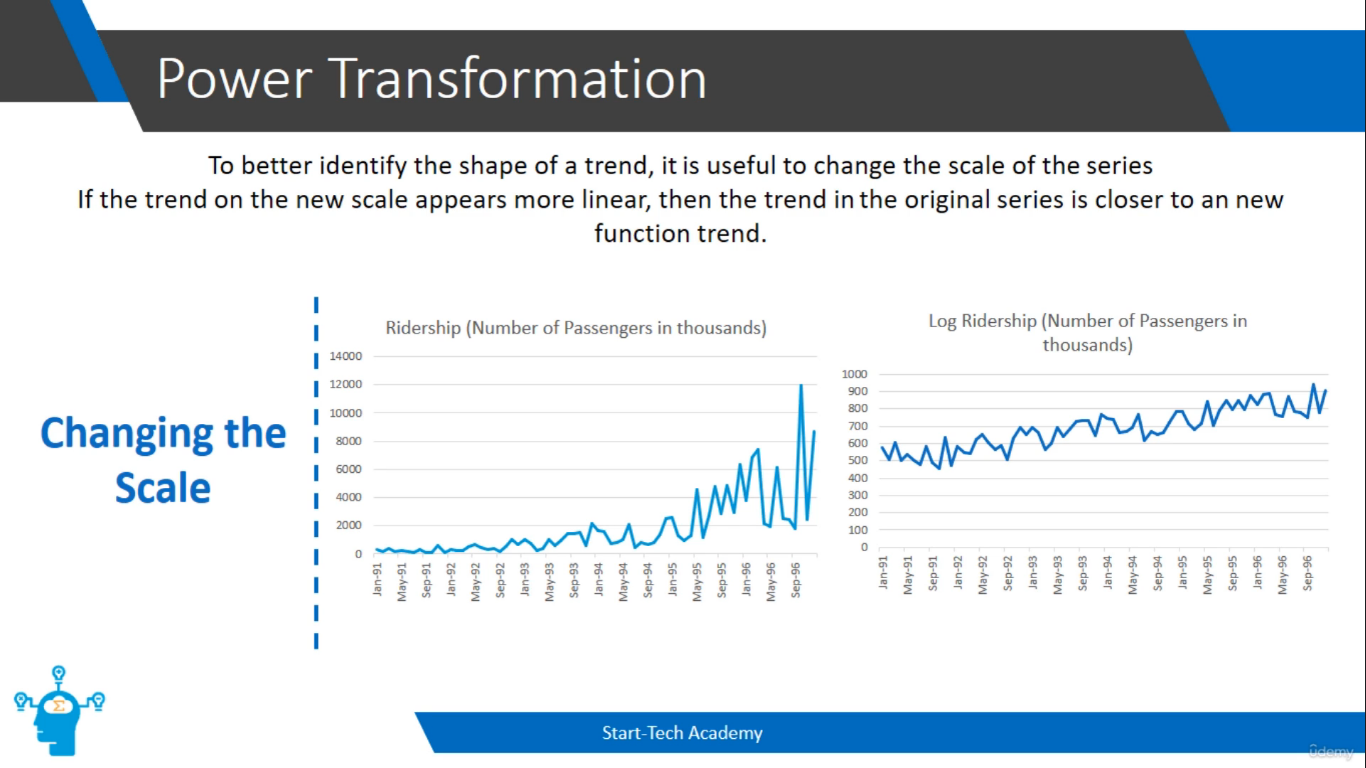

# Time Series Concepts

## ACF & PACF

https://www.youtube.com/watch?v=DeORzP0go5I&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=3

https://www.youtube.com/watch?v=y8opUEd05Dg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=4

## White Noise

We are learning about white noise, because if the series that we want to forecast that **series** is **white noise**, then we **cannot predict** that series. We cannot forecast that series white noise basically means that it is a **sequence of random numbers** and we **cannot forecast** random numbers.

https://www.youtube.com/watch?v=cr4zIXAmSRI&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=8

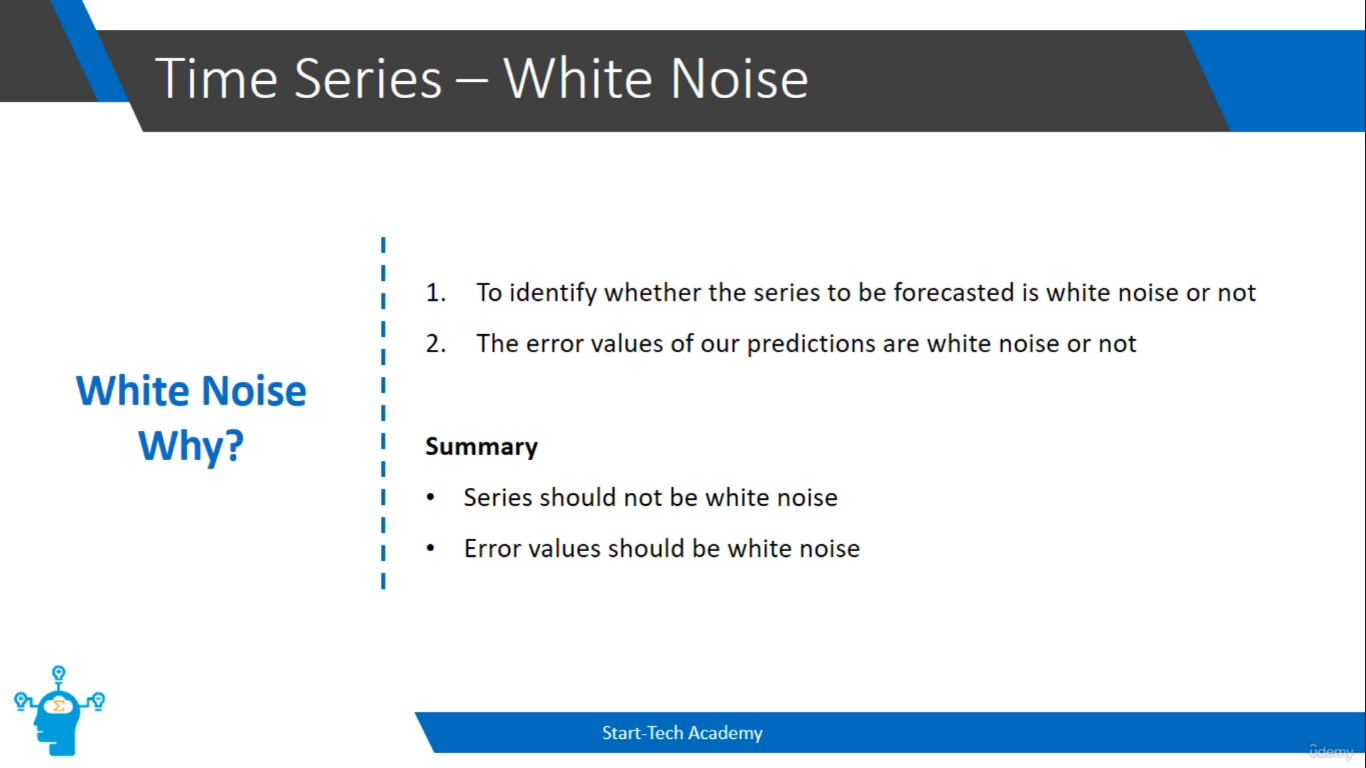

If these error values are not white noise, then this means that there is still information which could have been modelled. But our current model was not able to take out that information in such a case. We may look for some more advanced forecasting model. Whereas if the forecast errors are white noise, it means that all information has been harnessed and all that is left is random fluctuations.

### Random Walk & Naive Forecasting

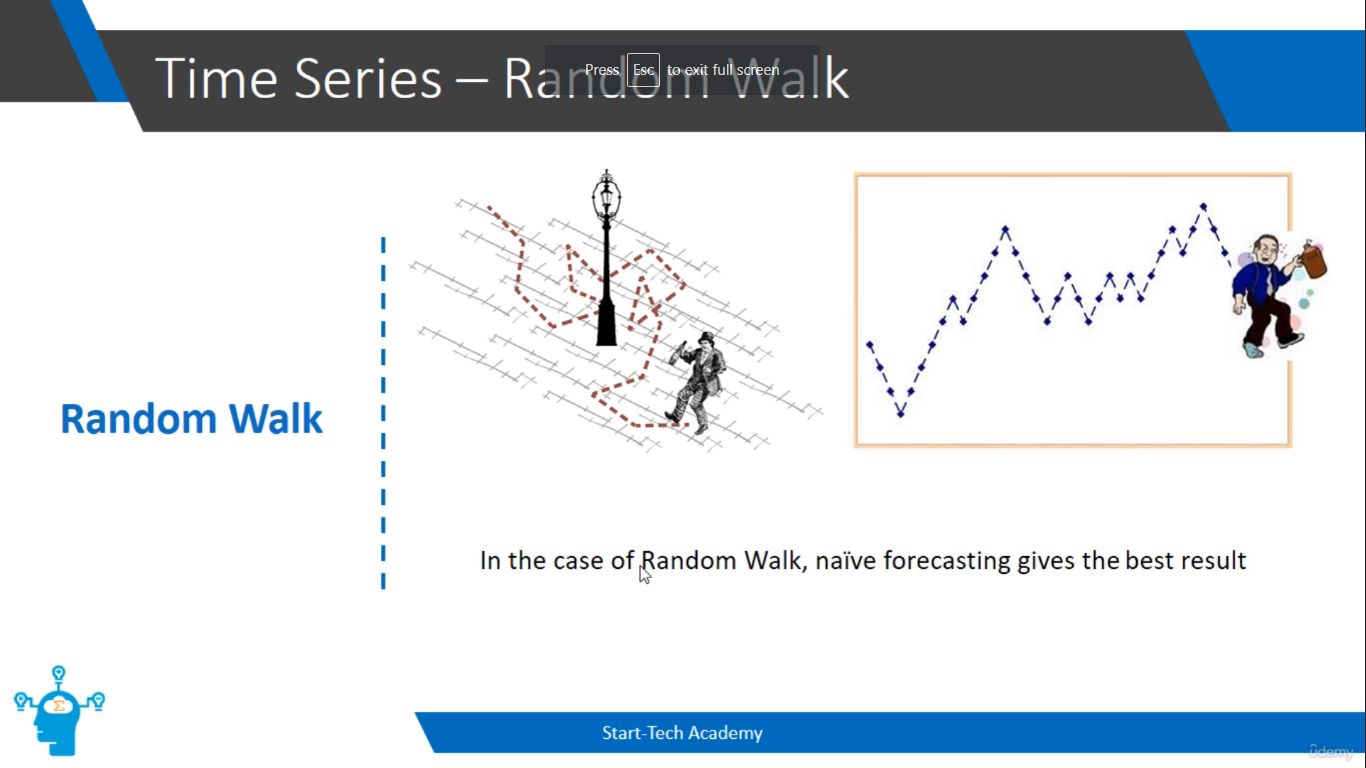

So when a series is a random walk, we use previous value as the forecast for the next value. This is also called naive forecasting for a random walk. None of the advanced models can give you better prediction accuracy than naive forecasting. In fact, naive forecasting accuracy serves as a benchmark for all the other models also.

When we compare this accuracy, if the accuracy of our advanced model is better than the accuracy of naive forecast, then our model is finding out more information and we can say that the underlying series is not a random walk. But if other advanced model is not able to get better accuracy than a naive forecast, then probably the underlying series is a random walk. And that is why our advance model is not able to get more information out of that series.

# Decomposing Time Series

We can create a time series data as a combination of four different parts:
- Level is the average value in the series.
- Trend is the increasing or decreasing value in the series.
- Seasonality is the repeating short term cycle in the series.
- Noise is the random variation in the series.

There are two ways to combine these four parts to create a time series data:

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

Now we want to learn how to decompose our time series data in these four different parts.

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
miles_decomp_df = pd.read_csv('./data/us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [64]:
miles_decomp_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

In [65]:
miles_decomp_df.index = miles_decomp_df['Month']

In [66]:
miles_decomp_df.head()

Month  MilesMM
Month                         
1963-01-01 1963-01-01     6827
1963-02-01 1963-02-01     6178
1963-03-01 1963-03-01     7084
1963-04-01 1963-04-01     8162
1963-05-01 1963-05-01     8462

In [67]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

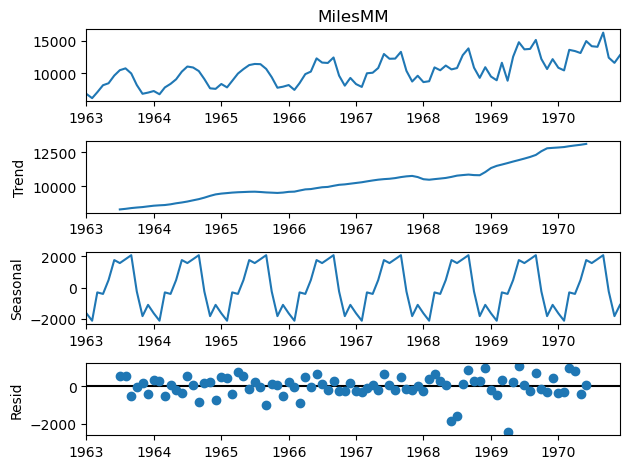

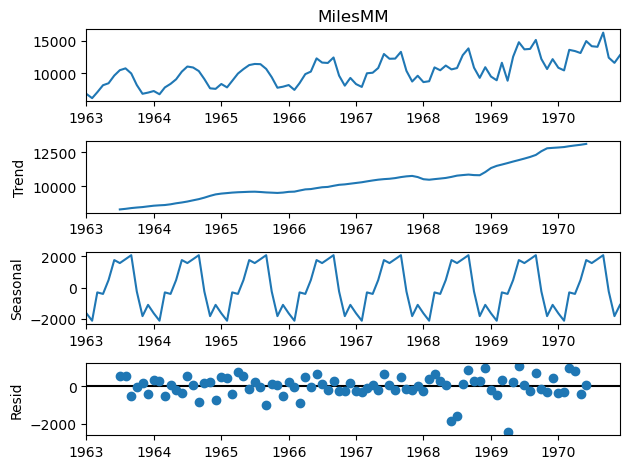

In [68]:
result.plot()

In [69]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

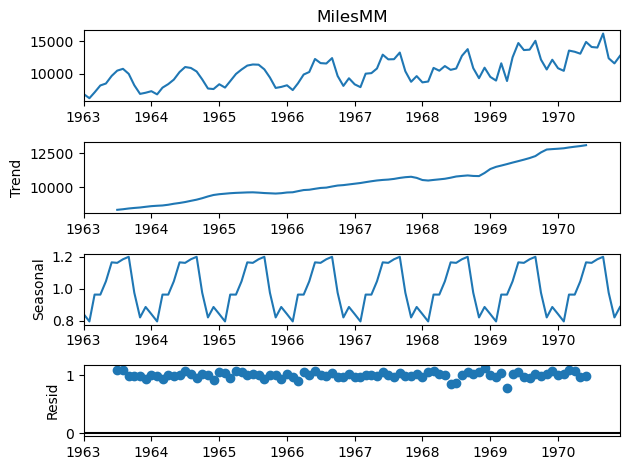

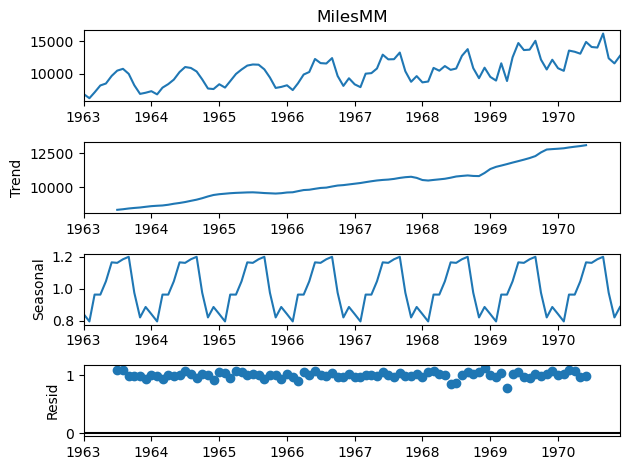

In [70]:
result2.plot()

# Differencing

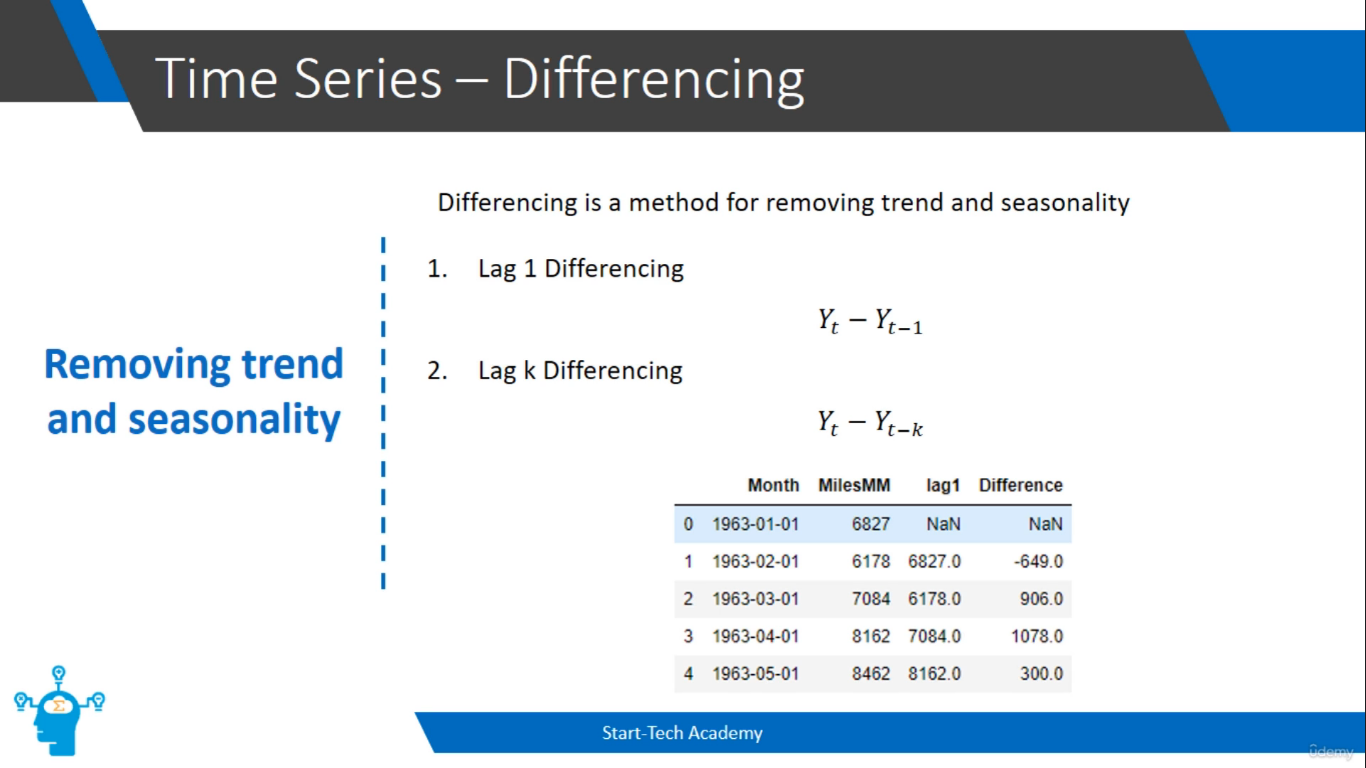

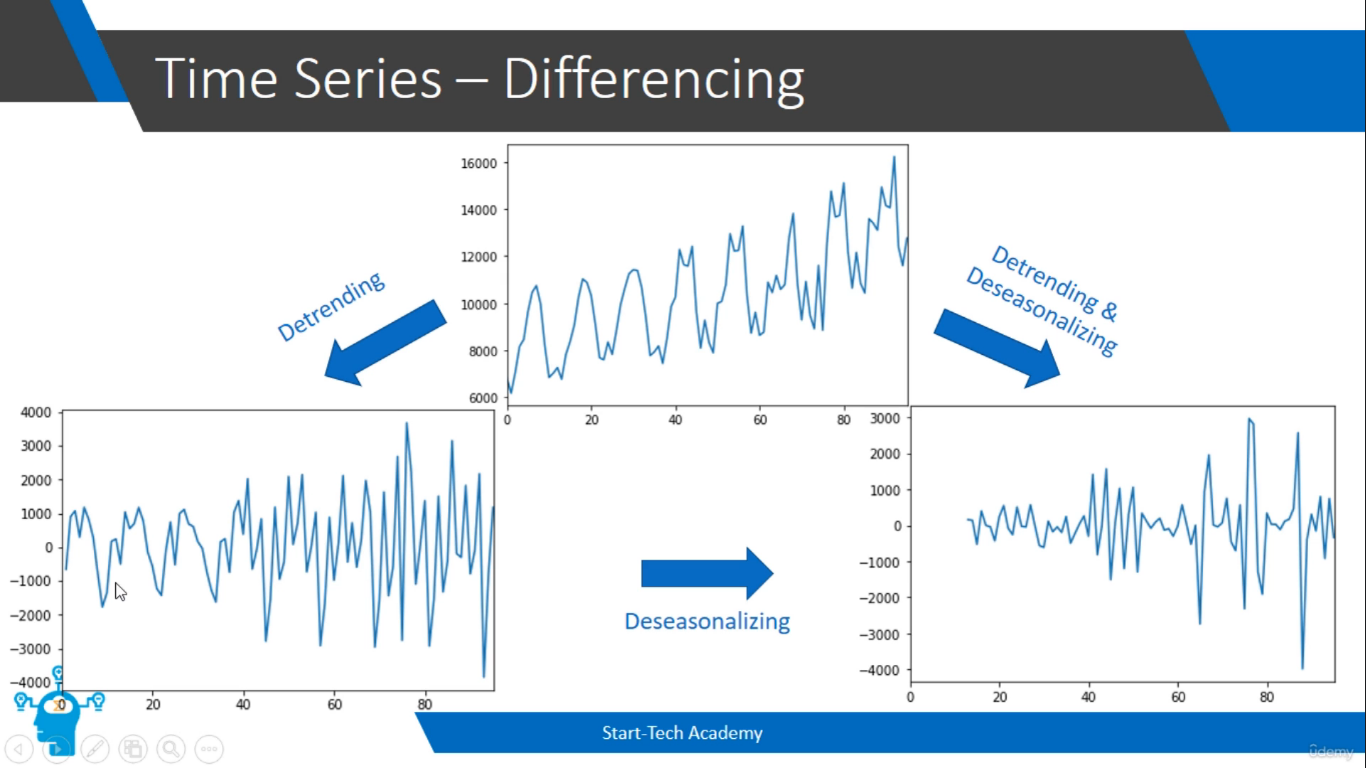

your lag 1 differencing will give you de trended series When you do one time differencing, you'll be able to remove linear trends, for quadratic and exponantial trends We often have another round of lag 1 differencing, which has to be applied to a different series. So for a quadratic trend, we will take the new series and do differencing again. The series that we will get then will not have the quadratic trend.

Once you have a series which does not have trend. You can use differencing to remove seasonality also for removing a seasonal pattern with n seasons. The resulting series that you will get will be be de seasonalised least seasonality will be removed from it.

in case you have both trend and seasonality in your data. You have to do differencing twice, once to remove the trend. And second, to remove the seasonality.

We apply this method of differencing to get a series which do not have trend and seasonality. And then we can apply those models where the series must be deseasonalize and detrended.

In [71]:
miles_df = pd.read_csv('./data/us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [72]:
miles_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

## Detrending

To **remove trend**, we apply **differencing** for period equal to **one**.

In [73]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [74]:
miles_df.head()

Month  MilesMM    lag1
0 1963-01-01     6827     NaN
1 1963-02-01     6178  6827.0
2 1963-03-01     7084  6178.0
3 1963-04-01     8162  7084.0
4 1963-05-01     8462  8162.0

In [75]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [76]:
miles_df.head()

Month  MilesMM    lag1  MilesMM_diff_1
0 1963-01-01     6827     NaN             NaN
1 1963-02-01     6178  6827.0          -649.0
2 1963-03-01     7084  6178.0           906.0
3 1963-04-01     8162  7084.0          1078.0
4 1963-05-01     8462  8162.0           300.0

This new difference series should not contain any trend.

In [77]:
miles_df.index = miles_df['Month']

In [78]:
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')

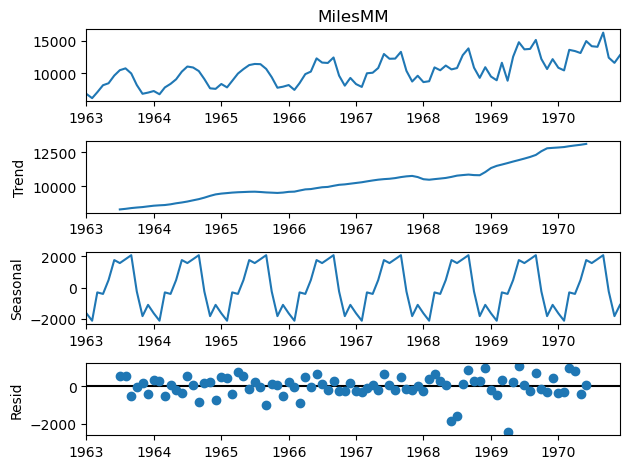

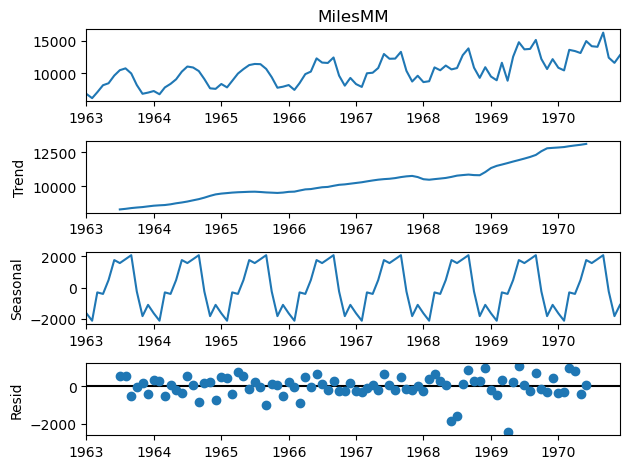

In [79]:
result_a.plot()

In [80]:
result_b = seasonal_decompose(miles_df.iloc[1:, 3], model='additive')

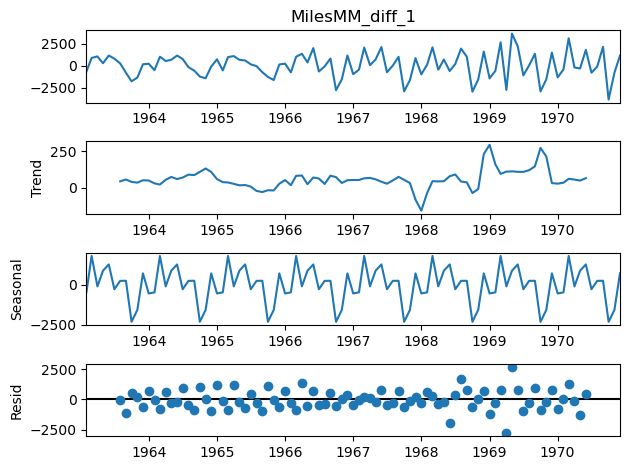

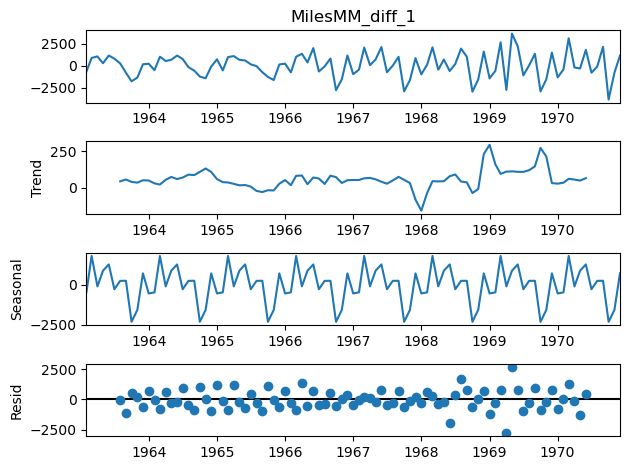

In [81]:
result_b.plot()

## Deseasoning

We apply differencing on the detrended data.

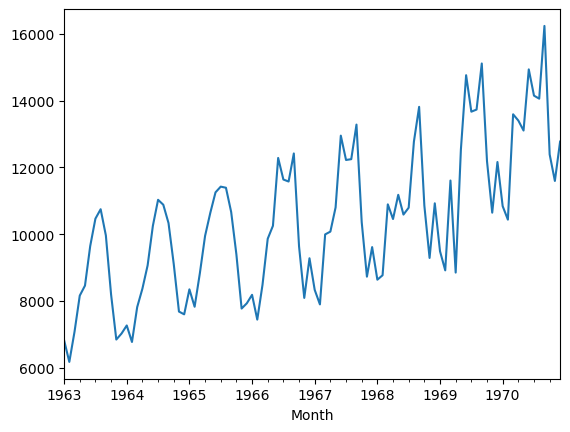

In [82]:
miles_df['MilesMM'].plot()
plt.show()

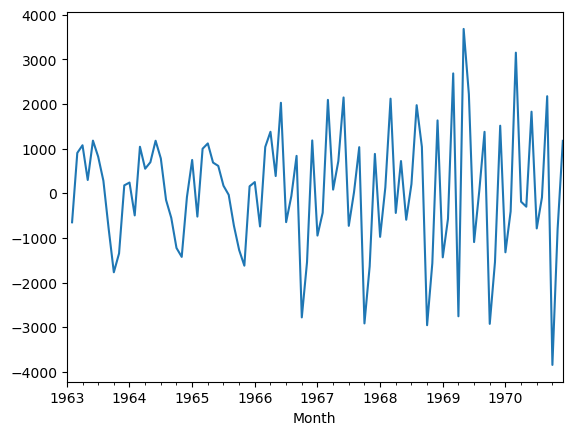

In [83]:
miles_df['MilesMM_diff_1'].plot()
plt.show()

In [84]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

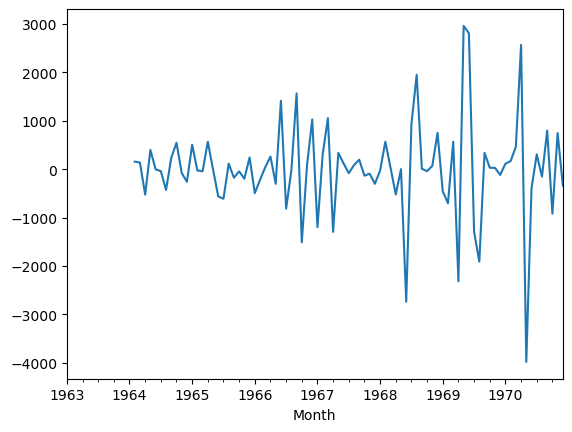

In [85]:
miles_df['MilesMM_diff_12'].plot()
plt.show()

In [86]:
miles_df.head(15)

Month  MilesMM     lag1  MilesMM_diff_1  MilesMM_diff_12
Month                                                                   
1963-01-01 1963-01-01     6827      NaN             NaN              NaN
1963-02-01 1963-02-01     6178   6827.0          -649.0              NaN
1963-03-01 1963-03-01     7084   6178.0           906.0              NaN
1963-04-01 1963-04-01     8162   7084.0          1078.0              NaN
1963-05-01 1963-05-01     8462   8162.0           300.0              NaN
1963-06-01 1963-06-01     9644   8462.0          1182.0              NaN
1963-07-01 1963-07-01    10466   9644.0           822.0              NaN
1963-08-01 1963-08-01    10748  10466.0           282.0              NaN
1963-09-01 1963-09-01     9963  10748.0          -785.0              NaN
1963-10-01 1963-10-01     8194   9963.0         -1769.0              NaN
1963-11-01 1963-11-01     6848   8194.0         -1346.0              NaN
1963-12-01 1963-12-01     7027   6848.0           179.0              NaN
1964-01-01 1964-01-01     7269   7027.0           242.0              NaN
1964-02-01 1964-02-01     6775   7269.0          -494.0            155.0
1964-03-01 1964-03-01     7819   6775.0          1044.0            138.0

In [87]:
result_c = seasonal_decompose(miles_df.iloc[13:, 4], model='additive')

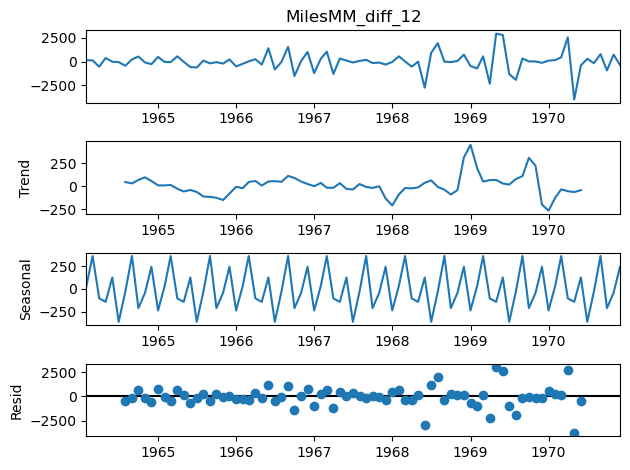

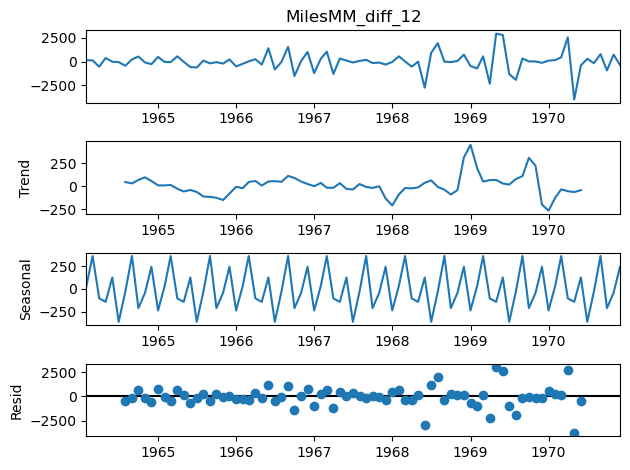

In [88]:
result_c.plot()

# Train-Test Split

In [89]:
temp_df = pd.read_csv('./data/daily-min-temperatures.csv', parse_dates=[0])

In [90]:
temp_df.head()

Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8

In [91]:
temp_df.shape

(3650, 2)

In [92]:
temp_df.shape[0]

3650

In [93]:
train_size = int(temp_df.shape[0] * 0.8)
train_size

2920

In [94]:
train = temp_df[:train_size]

In [95]:
test = temp_df[train_size:]

In [96]:
train.shape, test.shape

((2920, 2), (730, 2))

## Walk Forward Validation

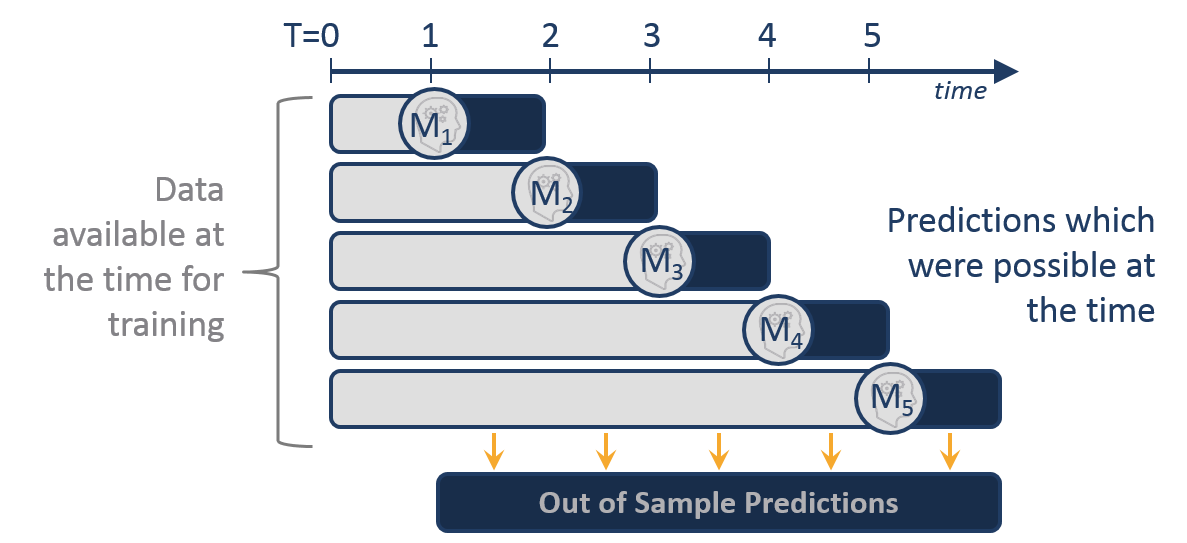

# Persistence Model

Persistence model or naive forecast model. In **naive forecast**, we can simply **assume** that the **last period value** is the **forecast** for **this period**. 

In [17]:
df = pd.read_csv('./data/daily-min-temperatures.csv', parse_dates=[0])

In [19]:
df.head()

Date  Temp
Date                       
1981-01-01 1981-01-01  20.7
1981-01-02 1981-01-02  17.9
1981-01-03 1981-01-03  18.8
1981-01-04 1981-01-04  14.6
1981-01-05 1981-01-05  15.8

In [22]:
df['t'] = df['Temp'].shift(1)

In [23]:
df.head()

Date  Temp     t
Date                             
1981-01-01 1981-01-01  20.7   NaN
1981-01-02 1981-01-02  17.9  20.7
1981-01-03 1981-01-03  18.8  17.9
1981-01-04 1981-01-04  14.6  18.8
1981-01-05 1981-01-05  15.8  14.6

We take the last 7 values as the test data.

In [9]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [10]:
train.head()

Date  Temp     t
1 1981-01-02  17.9  20.7
2 1981-01-03  18.8  17.9
3 1981-01-04  14.6  18.8
4 1981-01-05  15.8  14.6
5 1981-01-06  15.8  15.8

In [11]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

## Walk Forward Validation

In [12]:
predictions = test_X.copy()

In [13]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

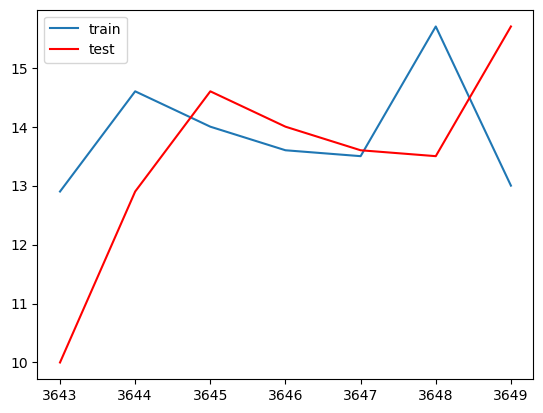

In [16]:
plt.plot(test_y, label='train')
plt.plot(predictions, color='red', label='test')
plt.legend()
plt.show()

Why this **mse** value for this **naive forecast** is important? because we are going to **evaluate** our **advanced models** using this mse value. It also tells us whether our data is a random walk or not. If the advanced model such as AR, MA, etc is **not able to improve** this **mse** value, then you can say that your **time series** is a **random walk**.

# Auto Regression Model

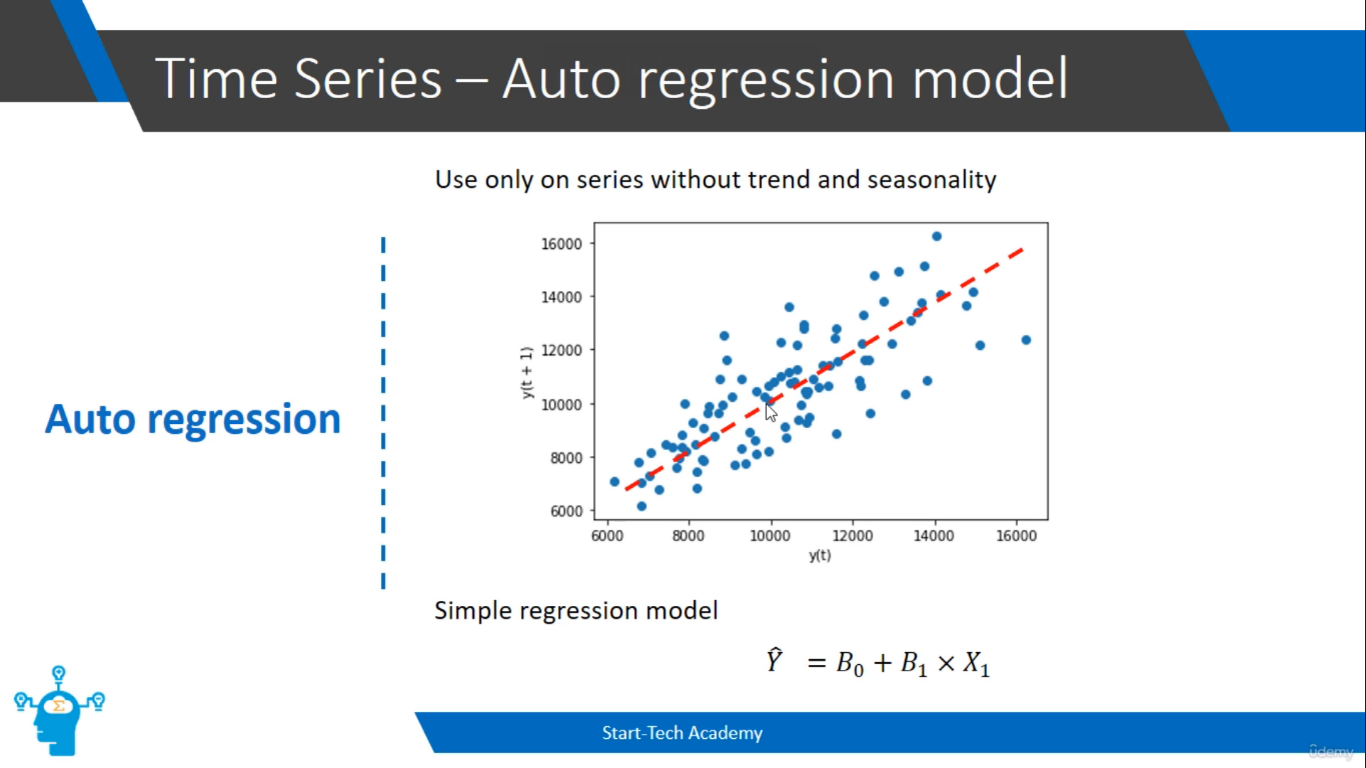

https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

This method should be applied to time series **without trend** and **seasonality**. Autoregression is running a regression model on the laged values and using this model to predict future values.

In [17]:
df = pd.read_csv('./data/daily-min-temperatures.csv', parse_dates=[0])

In [18]:
train, test = df['Temp'][1:df.shape[0]-7], df['Temp'][df.shape[0]-7:]

In [33]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [19]:
train.shape, test.shape

((3642,), (7,))

In [25]:
train.iloc[3641]

10.0

In [20]:
from statsmodels.tsa.ar_model import AutoReg

In [26]:
model = AutoReg(train, lags=29)
model_fit = model.fit()

In [27]:
model_fit.params

const       0.557544
Temp.L1     0.588595
Temp.L2    -0.090826
Temp.L3     0.048262
Temp.L4     0.040065
Temp.L5     0.039302
Temp.L6     0.025946
Temp.L7     0.044668
Temp.L8     0.012768
Temp.L9     0.037436
Temp.L10   -0.000812
Temp.L11    0.004791
Temp.L12    0.018473
Temp.L13    0.026891
Temp.L14    0.000576
Temp.L15    0.024810
Temp.L16    0.007403
Temp.L17    0.009916
Temp.L18    0.034160
Temp.L19   -0.009120
Temp.L20    0.024213
Temp.L21    0.018787
Temp.L22    0.012184
Temp.L23   -0.018553
Temp.L24   -0.001772
Temp.L25    0.016732
Temp.L26    0.019762
Temp.L27    0.009832
Temp.L28    0.006227
Temp.L29   -0.001377
dtype: float64

In [30]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)).dropna()
predictions

3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649    13.376567
dtype: float64

In [31]:
predictions.iloc[0]

13.053794217229806

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(test_y, predictions)
mse

1.232961203346274

So, the time series that we are using is not a random walk.

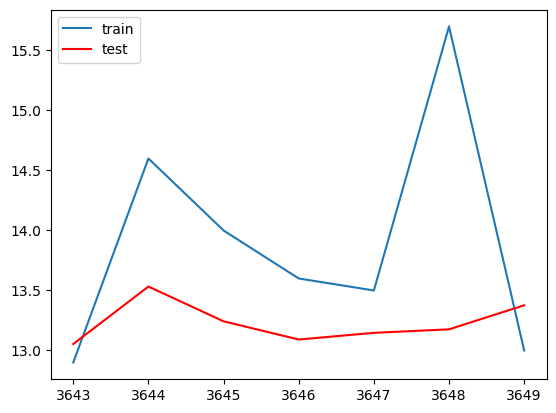

In [35]:
plt.plot(test_y, label='train')
plt.plot(predictions, color='red', label='test')
plt.legend()
plt.show()

## Walk Forward Validation

Learn how to implement walk forward validation for any time series technique.

In [36]:
df = pd.read_csv('./data/daily-min-temperatures.csv', parse_dates=[0])

In [37]:
train, test = df['Temp'][1:df.shape[0]-7], df['Temp'][df.shape[0]-7:]

In [40]:
data = train
predict = []
for t in test:
    model = AutoReg(data, 29)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

13.053794217229806
13.660699943835198
14.353164144090156
13.430120791627015
13.374756477185116
13.4791112994205
14.767773018439868


In [41]:
predict

[13.053794217229806,
 13.660699943835198,
 14.353164144090156,
 13.430120791627015,
 13.374756477185116,
 13.4791112994205,
 14.767773018439868]

In [42]:
mse = mean_squared_error(test.values, predict)
mse

1.304653588566525

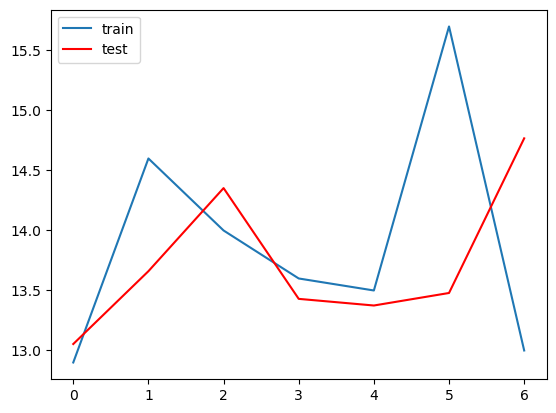

In [43]:
plt.plot(test.values, label='train')
plt.plot(predict, color='red', label='test')
plt.legend()
plt.show()

# Moving Average

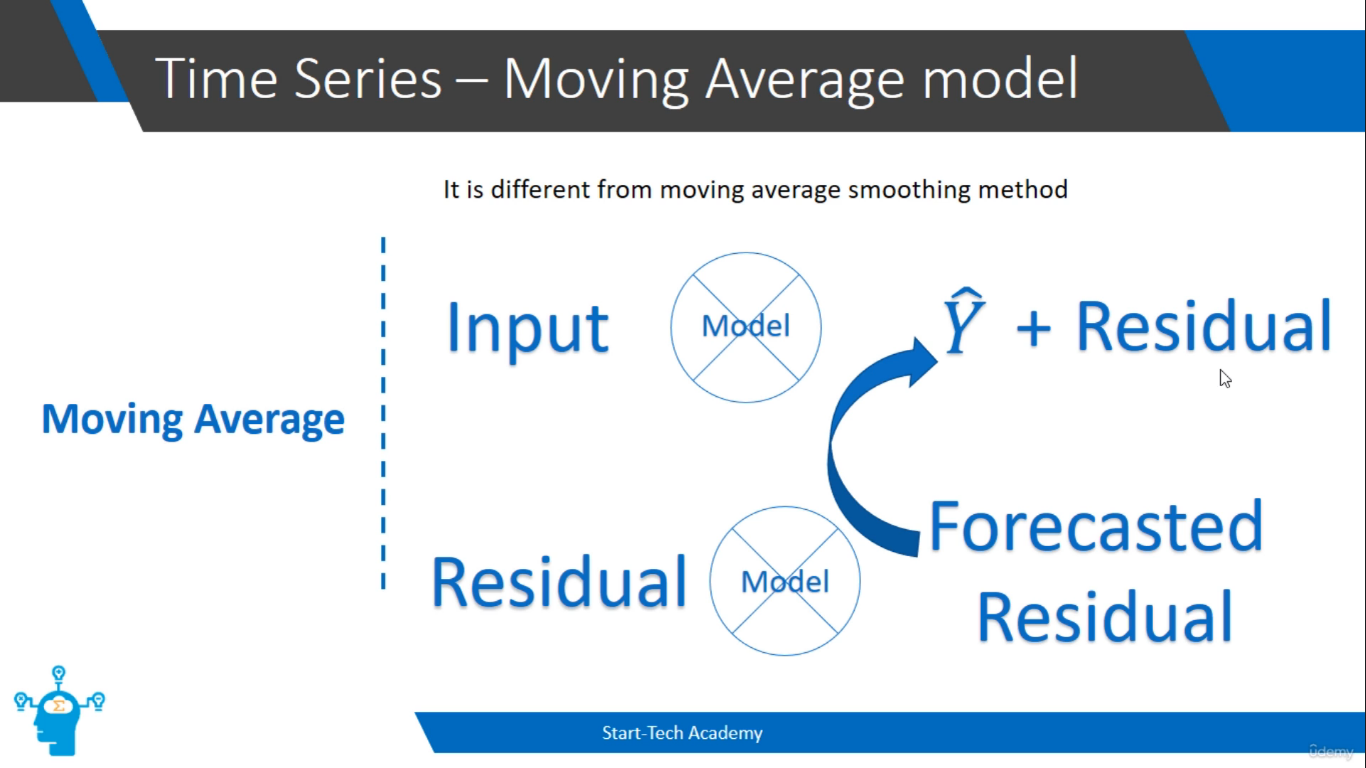

Ideally, these set of residuals, that is the time series of residues should be white noise. There should not be any pattern, in the residual values. But practically, this may not always happen. Our model may leave some information in the residuals, to extract that information and improve our forecast. We run a forecasting model on our residuals also. We tried to forecast the future residuals. If there is any pattern in the residuals, this second level model, we are calling it the second level model.

So if there is any pattern in the residuals our second level model will identify it and capture that information in the forecast of residues. We can then add back these forecasted residuals to our original forecast to get better forecast.

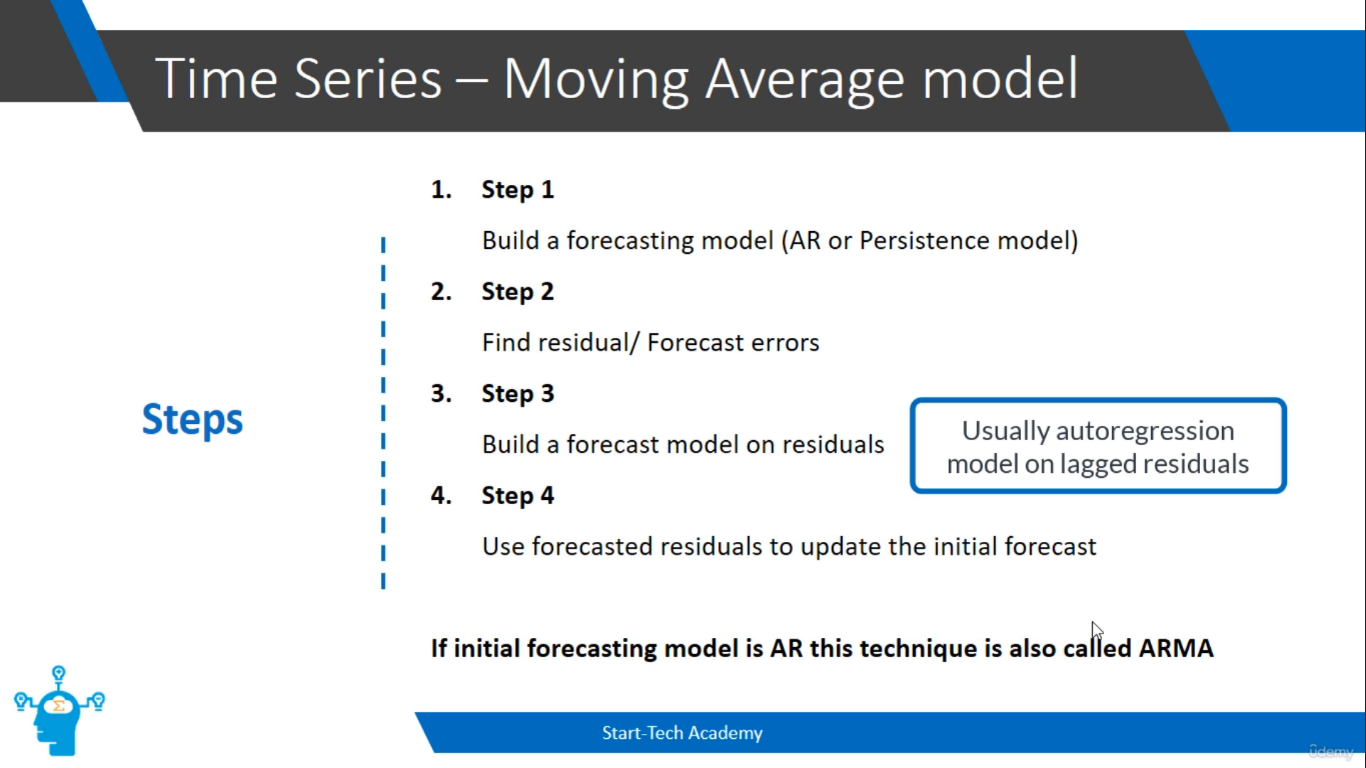

Remember that **ARMA **can only on the series **without trend** and **seasonality**.

In [3]:
df = pd.read_csv('./data/daily-min-temperatures.csv', parse_dates=[0])

In [4]:
df['t'] = df['Temp'].shift(1)

Create residual values by implementing naive model.

In [5]:
df['Resid'] = df['Temp'] - df['t']

In [6]:
df.head()

Date  Temp     t  Resid
0 1981-01-01  20.7   NaN    NaN
1 1981-01-02  17.9  20.7   -2.8
2 1981-01-03  18.8  17.9    0.9
3 1981-01-04  14.6  18.8   -4.2
4 1981-01-05  15.8  14.6    1.2

In [7]:
train, test = df['Resid'][1:df.shape[0]-7], df['Resid'][df.shape[0]-7:]

In [8]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [9]:
train.iloc[0]

-2.8000000000000007

In [10]:
train.tail()

3638    0.7
3639   -2.3
3640    0.1
3641    0.7
3642   -3.9
Name: Resid, dtype: float64

In [11]:
len(train)

3642

In [12]:
len(test)

7

Now we are going to implement autoregression model on the residual values.

In [13]:
from statsmodels.tsa.ar_model import AutoReg

In [14]:
model = AutoReg(train, lags=29)
model_fit = model.fit()

In [15]:
model_fit.params

const       -0.006415
Resid.L1    -0.407139
Resid.L2    -0.496194
Resid.L3    -0.445747
Resid.L4    -0.403706
Resid.L5    -0.362528
Resid.L6    -0.334810
Resid.L7    -0.288468
Resid.L8    -0.274281
Resid.L9    -0.235333
Resid.L10   -0.234799
Resid.L11   -0.228532
Resid.L12   -0.208608
Resid.L13   -0.180324
Resid.L14   -0.178425
Resid.L15   -0.152265
Resid.L16   -0.143617
Resid.L17   -0.132501
Resid.L18   -0.097075
Resid.L19   -0.104927
Resid.L20   -0.079371
Resid.L21   -0.059348
Resid.L22   -0.045921
Resid.L23   -0.063197
Resid.L24   -0.063441
Resid.L25   -0.045061
Resid.L26   -0.023578
Resid.L27   -0.011882
Resid.L28   -0.003789
Resid.L29   -0.003422
dtype: float64

In [17]:
pred_resid = model_fit.predict(start=len(train)-1, end=len(train)+len(test)-1).dropna()
pred_resid

3642    2.004986
3643    1.264192
3644    0.510869
3645   -0.251687
3646   -0.122054
3647    0.077509
3648    0.055600
dtype: float64

Now we have the forecasted residual and we have to add it to our forecasted value.

In [17]:
pred_resid

3643    1.264192
3644    0.510869
3645   -0.251687
3646   -0.122054
3647    0.077509
3648    0.055600
3649         NaN
dtype: float64

In [19]:
df['t'][df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [19]:
predictions = df['t'][df.shape[0]-7:] + pred_resid
predictions

3642          NaN
3643    11.264192
3644    13.410869
3645    14.348313
3646    13.877946
3647    13.677509
3648    13.555600
3649          NaN
dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mse = mean_squared_error(test_y, predictions)

NameError: name 'test_y' is not defined

In [22]:
plt.plot(test_y)
plt.plot(predictions, color='red')

NameError: name 'test_y' is not defined

And I've been repeating this several times that **auto regression** and **moving average** models should **not be applied** on series, which has **trend** and **seasonality**.

# ACF & PACF

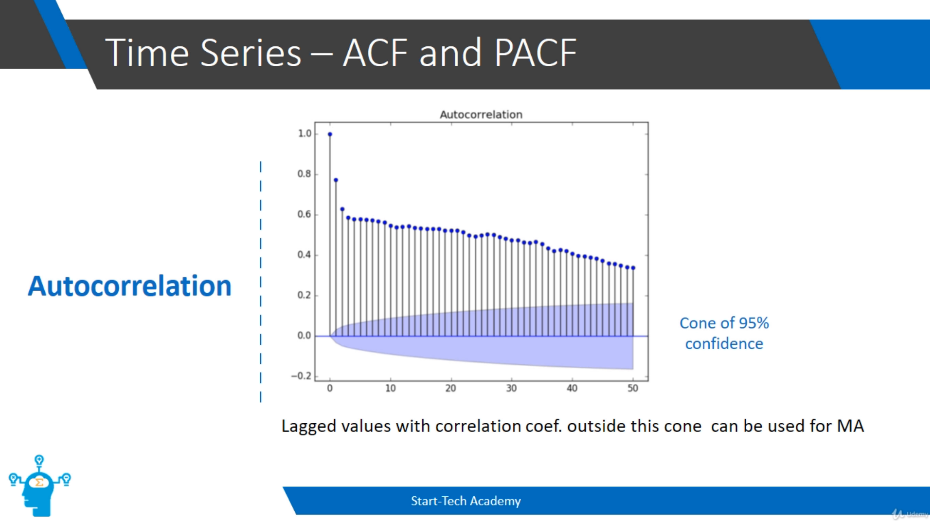

A point outside of this cone means that we are more than 95% confident that there is a correlation between these variables and this correlation is not just any random statisticall fluctuation. We can take them into consideration. This works well for the moving average method where we have to find the relationship between lag's of residuals. So ACF works well there But when we are looking at auto regression, there is some ambiguity in the ACF plot.

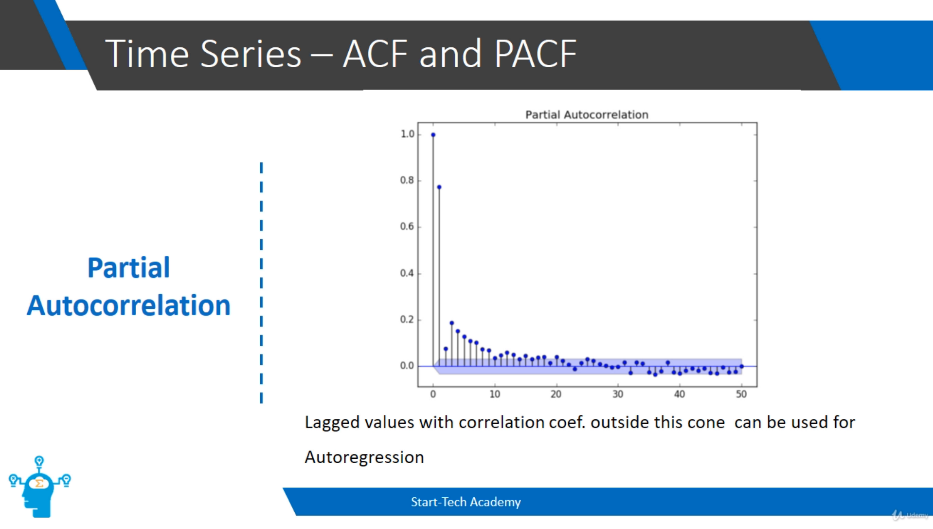

PACF gives a much clearer view of k. That is the number of lag values we should use in auto regression.
So when we are trying to find out the number of lag values which we should use in auto regression model, we have to look at the partial autocorrelation function . 

# ARIMA

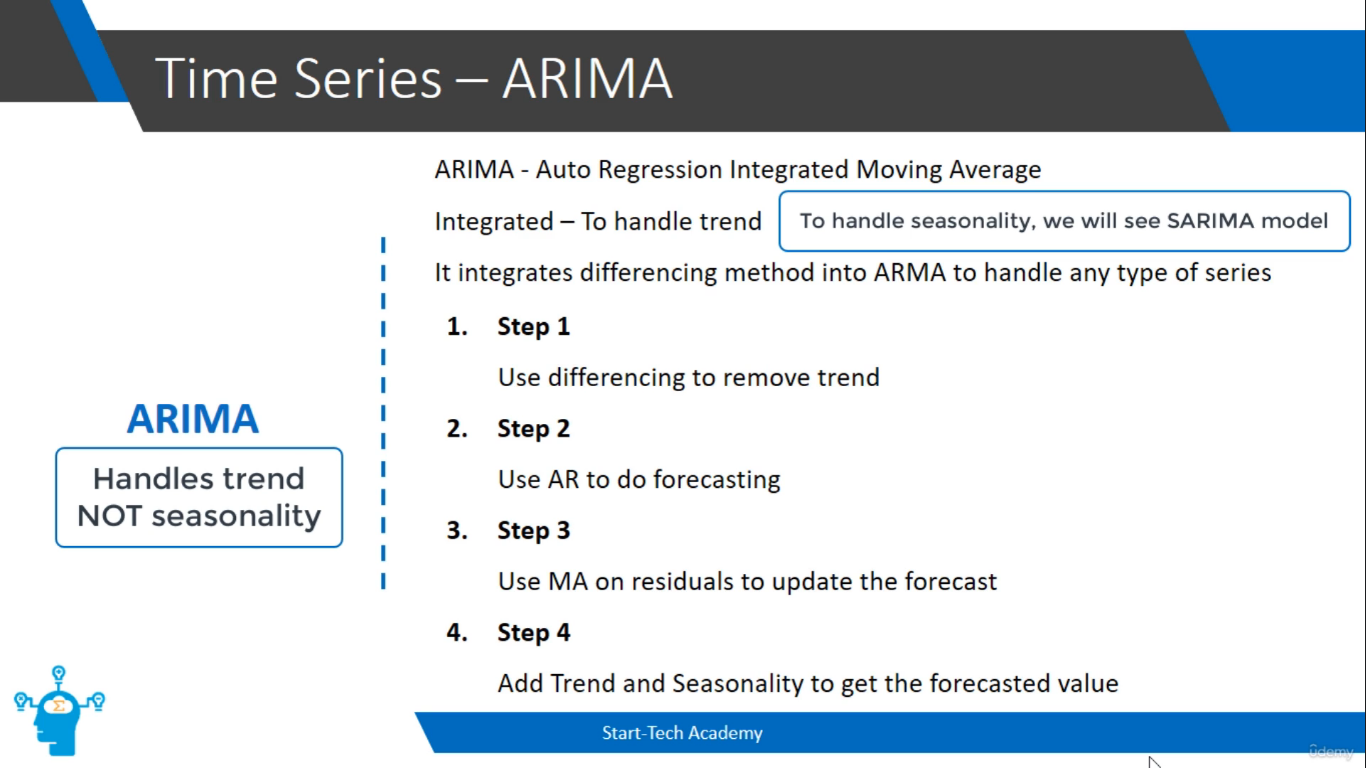

This method is called **integrated** because it includes the method of **differencing**. Differencing was used to **deseasonalize** and **detrend** the data.

I've been repeating this several times that **auto regression** and **moving average** models should **not be applied** on series, which has **trend** and **seasonality**. So to handle trend and seasonality, we integrate our arma model with the differencing method.

We will first **remove trend** using the **differencing** method. We may have to do **differencing several times** if we are trying to remove **non-linear trend**. Also, once we have **detrended**, we apply **auto regression** on this new series to find the initial set of forecast. Using these **initial forecast**, we find the **residuals** or **forecast errors**. Then we apply **moving average** method on these residuals to **update** our **forecasts**. In the end, we reintroduce the effect of trend.

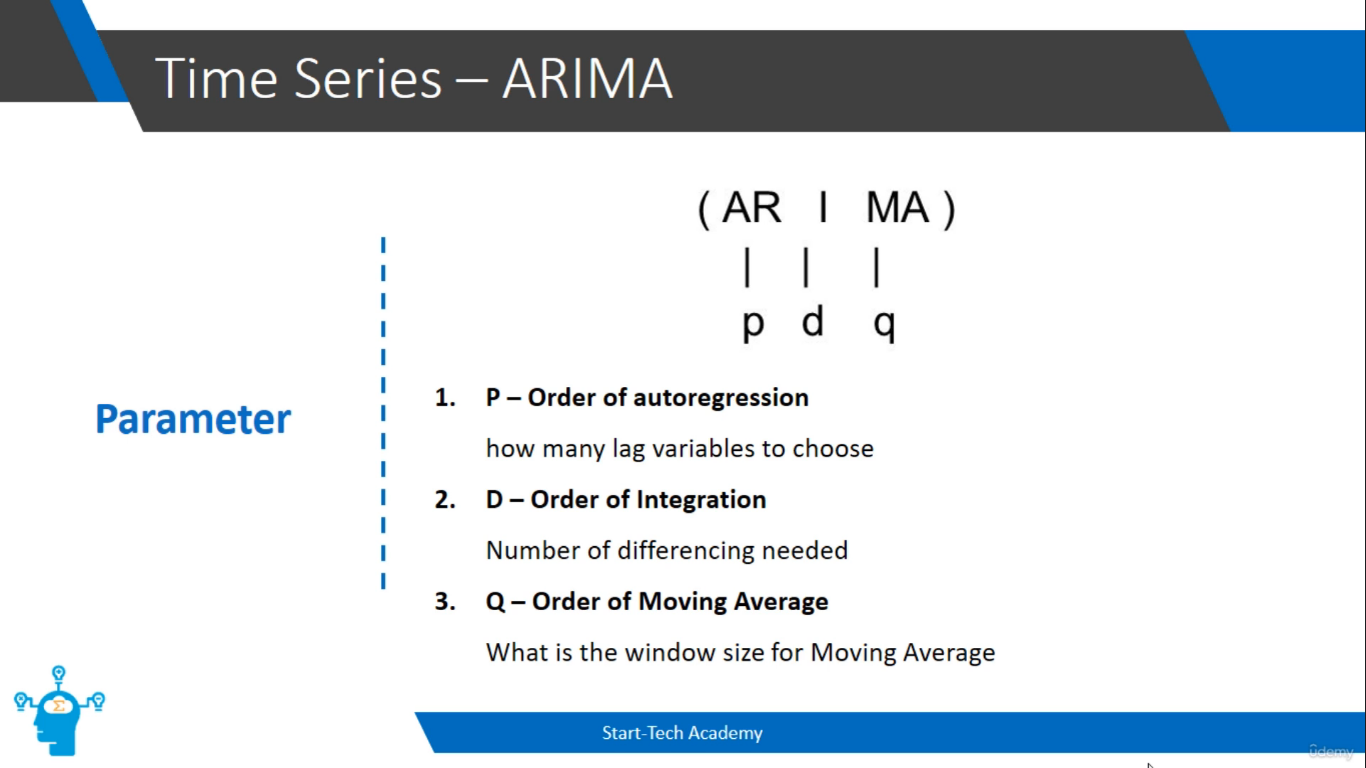

**P**

This basically denotes the number of **lagged values** we are going to use in our **auto regression model**. If we are using only t and t-1 values to forecast t+1 values, then P is equal to 2. If we use only t value, then P is equal to one.

**D**

If we are seeing a **quadratic trend**, we may do **differencing twice**, in which case D will be equal to 2. For **linear trends**, **single differencing** is sufficient. In which case we have D=1.

**Q**

This is basically the **window size** of the **residuals** that we will be considering to **forecast future residuals** if we are forecasting residuals on the basis of last three residual values. Then Q is equal to 3. If we are using last two residual values, then Q is equal to 2.

But how do you know what are the right values of P, D and Q?

- One way to know is by using our experience and understanding of the problem at hand. For example, if we know that our product shows a quadratic trend, we can straightaway set D is equal to 2.
- The second way is by running a software iteration and finding which set of values of P, D and Q give the maximum test set accuracy. When we do not have large data and there are limited number of options for P,D and Q, this can also be done.

In [3]:
df = pd.read_csv('./data/shampoo.csv', parse_dates=[0])

In [27]:
df.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

In [28]:
df.tail()

Month  Sales
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9

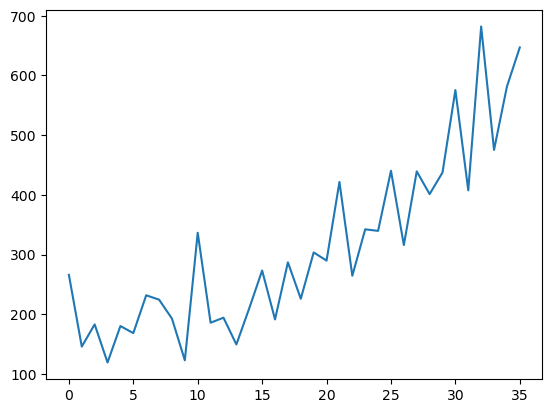

In [5]:
df['Sales'].plot()
plt.show()

Now, here, if you look at it, you can see that there is no seasonality at such and there is some sort of quadratic trend and therefore, since this is a quadratic trend, we need two differencing to make it stationary.

Trend is polynomial. D = 2


In case of linear trend, We should use D equal to one.

## Autocorrelation

In [6]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

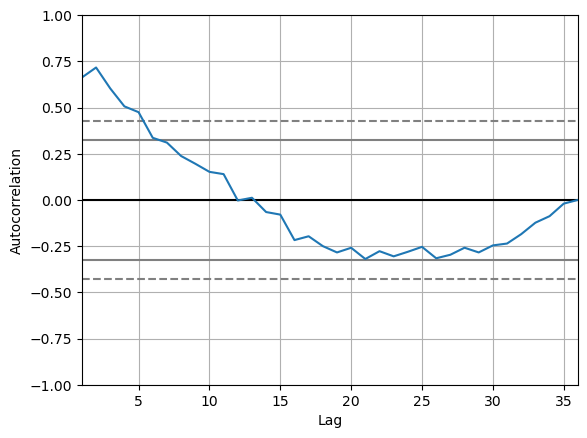

In [7]:
autocorrelation_plot(df['Sales'])

ACF => Q = 5

## Partial Autocorrelation

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf

/home/siamak/anaconda3/envs/ts/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


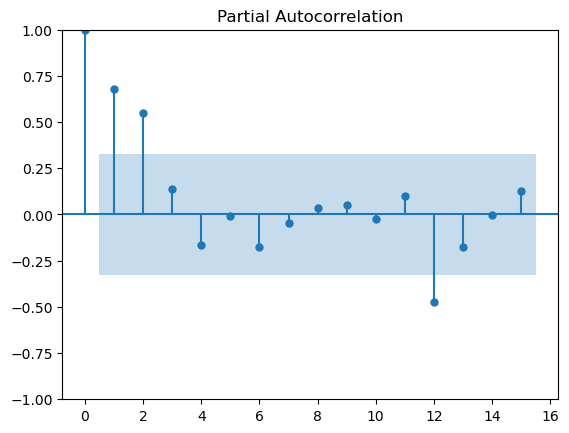

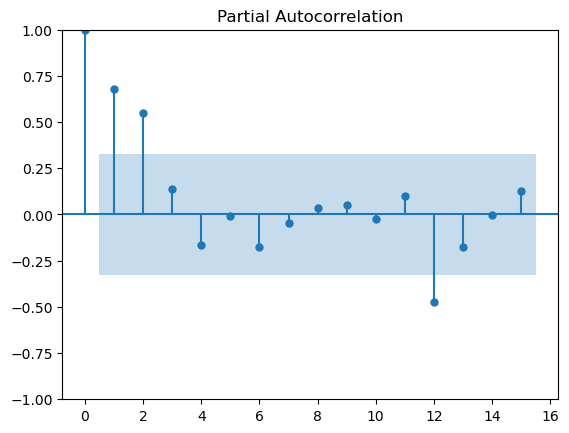

In [9]:
plot_pacf(df['Sales'], lags=15)

PACF => P = 2

Now you can see that this partial autocorrelation is crossing the confidence interval. at value three two. Therefore, we should consider 2 as p for our arima model.

So for any time series, if you want to run arima model:
- First plot the line chart and identify the trend. 
- Then plot the autocorrelation plot. And look at where the autocorrelation plot is crossing the confidence interval line. 
- And then also plot the partial autocorrelation graph to find out P. 

Now, since we have the value of P, Q and D, we should train our arima model on these parameters.

In [10]:
import statsmodels.api as sm

In [11]:
model = sm.tsa.arima.ARIMA(df['Sales'], order=(2, 2, 5))

In [12]:
model_fit = model.fit()

/home/siamak/anaconda3/envs/ts/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -189.635
Date:                Thu, 13 Oct 2022   AIC                            395.269
Time:                        16:33:13   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.741      0.000      -2.391      -1.425
ar.L2         -0.9545      0.219     -4.363      0.000      -1.383      -0.526
ma.L1         -0.0681     19.857     -0.003      0.997     -38.987      38.851
ma.L2         -1.8461      2.774     -0.665      0.506      -7.284       3.592
ma.L3          0.3024     19.803      0.015      0.988     -38.511      39.116
ma.L4          0.9883      2.806      0.352      0.725      -4.512       6.489
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.5697      0.014   1.95e+05      0.000    2696.543    2696.597
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+23. Standard errors may be unstable.
"""

The **smaller** the **P-value** , the **more important** that variable is.

In [14]:
residuals = model_fit.resid

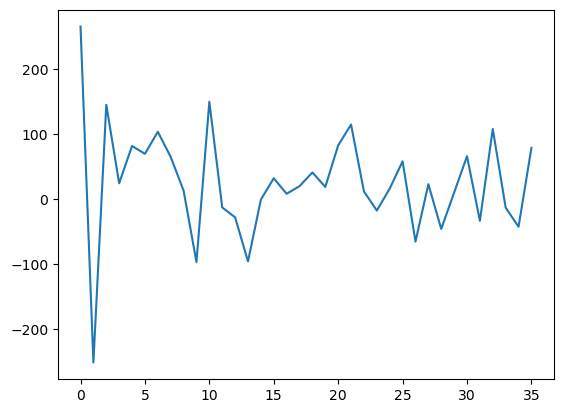

In [15]:
residuals.plot()
plt.show()

Now, we have discussed that the **residual** should be in the form of **white noise**. There should be **no visible pattern** in your residual if there is any **pattern** in your **residual**. That means that you can **improve your model** and there is some information in your model that you are missing. 

In [16]:
residuals.describe()

count     36.000000
mean      25.166132
std       86.508246
min     -251.672098
25%      -14.150401
50%       19.384769
75%       72.117998
max      266.000000
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(p,d,q)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

So there is no need of finding out the residuals and running auto regression on that to execute moving average model, you can just use arima model as well to run the moving average model.

In [17]:
output = model_fit.forecast()
output

36    656.795678
dtype: float64

In [18]:
model_fit.forecast(5)

36    656.795678
37    637.266993
38    712.228566
39    710.393136
40    755.778265
Name: predicted_mean, dtype: float64

## Walk Forward ARIMA

In [19]:
df = pd.read_csv('./data/shampoo.csv', parse_dates=[0])

In [20]:
df.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

So this month, values are for 1901 So if you see one nine zero is missing from this data and that's why , pandas will not be able to identify that. This is the date format. So for this example, you can also use date time parse and then you can also give this parser as an argument while you are loading CSV.

def parser(x):
return datetime.strptime('190'+x, '%Y-%m')

So let's divide our data into to test and train.

In [21]:
train_size = int(df.shape[0] * 0.7)

In [22]:
train, test = df['Sales'][0:train_size], df['Sales'][train_size:]

In [23]:
train.shape, test.shape

((25,), (11,))

In [31]:
test

25    440.4
26    315.9
27    439.3
28    401.3
29    437.4
30    575.5
31    407.6
32    682.0
33    475.3
34    581.3
35    646.9
Name: Sales, dtype: float64

No implementing walk forward for arima is almost similar to the walk forward validation we implemented for ar model, we are going to use the same step, first we are defining data. Then we will run a loop for all the values in test. We will create a model for each run in this fall loop will save the first value of our y data into a list called Predict. And at the end of each run, we will include the test value into train data that we are going to use to train our model in the next run.

In [36]:
data = train
predict = []
counter = train_size
for t in test:
    print(f't          = {t}')
    model = sm.tsa.arima.ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(f't_forecast = {y[counter]:.2f}')
    predict.append(y[counter])
    data = np.append(data, t)
    data = pd.Series(data)
    counter += 1

t          = 440.4
t_forecast = 368.67
t          = 315.9
t_forecast = 335.04
t          = 439.3
t_forecast = 363.22
t          = 401.3
t_forecast = 357.65
t          = 437.4
t_forecast = 443.05
t          = 575.5
t_forecast = 378.37
t          = 407.6
t_forecast = 459.42
t          = 682.0
t_forecast = 526.89
t          = 475.3
t_forecast = 457.23
t          = 581.3
t_forecast = 672.91
t          = 646.9
t_forecast = 531.54


In [37]:
predict

[368.6689556923214,
 335.0447406878903,
 363.22022149503385,
 357.64532350627053,
 443.04783536696334,
 378.3656734866571,
 459.41502058415495,
 526.8908755663845,
 457.23127476167883,
 672.9149435746541,
 531.5414490874568]

In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

9170.052441098296

You can compare this mse value with other models as well.

# SARIMA or Seasonal ARIMA 

**ARIMA** models which were able to **handle trend** in the data. But an obvious **shortcoming** of arima method is that it is **unable to handle seasonality** in the data. To **handle seasonality** also, We can use the method of **differencing**, we can remove seasonality by subtracting the corresponding value from few time steps back.

This additional difference in step is incorporated in a model called SARIMA, which stands for seasonal auto regressive integrated moving average method. Basically seasonal ARIMA.

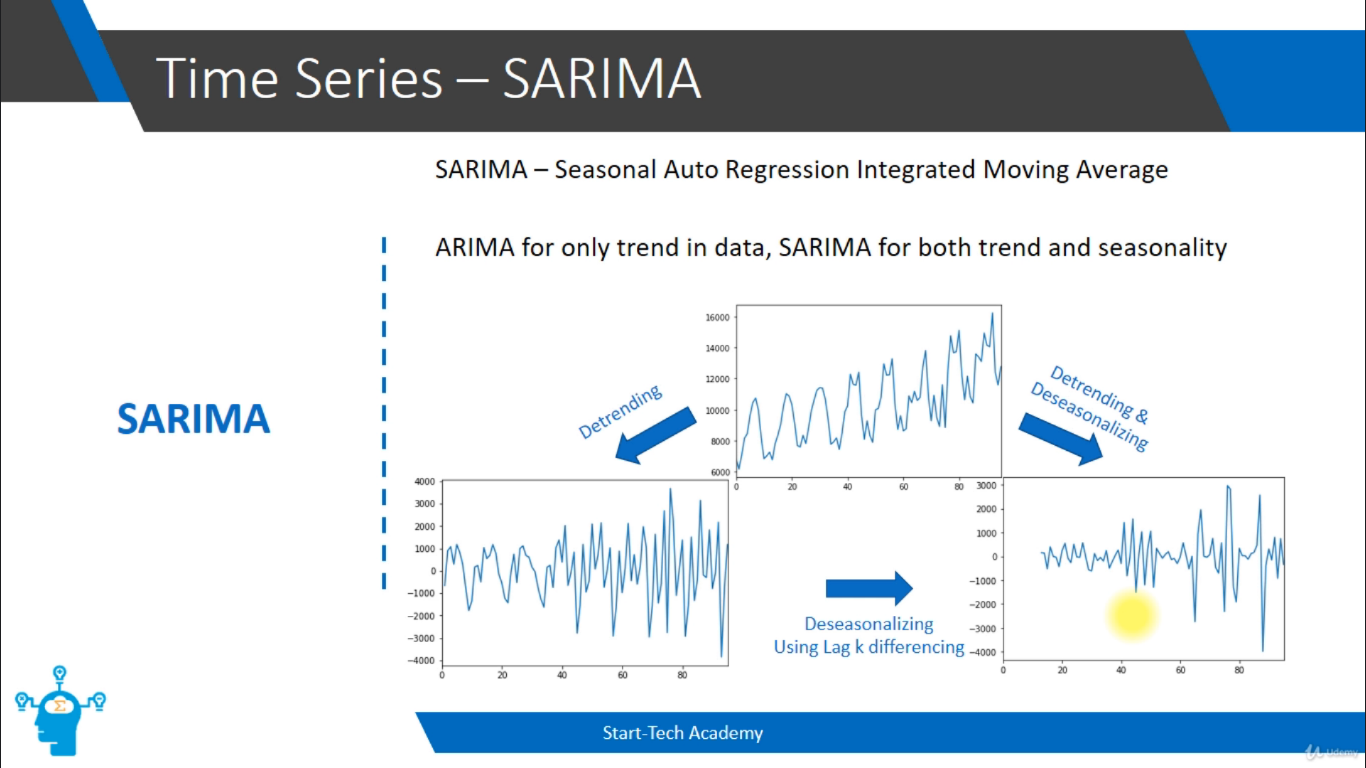

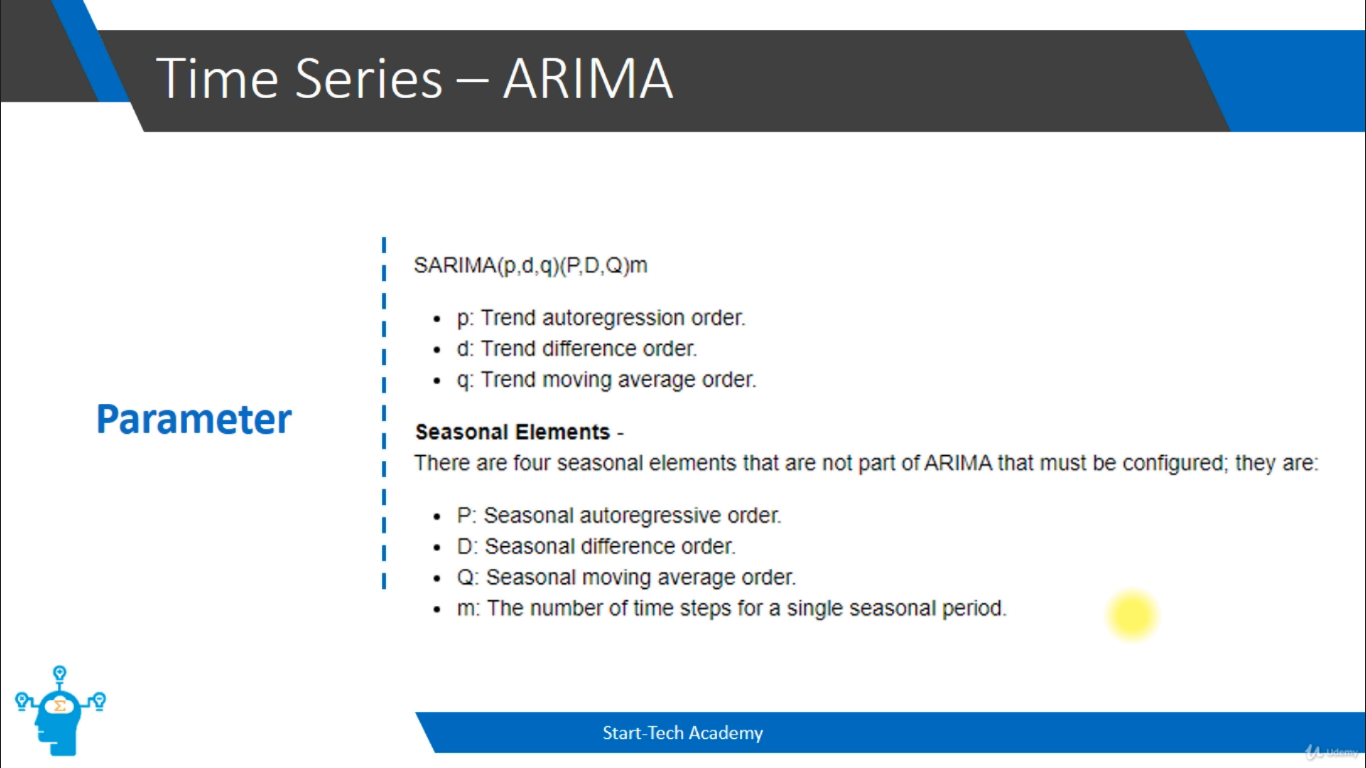

**m**

This M is the obvious one. The period of seasonality. So for monthly seasonality m will be 12 for weekly seasonality in daily data m will be 7. 

**P, D, Q**

They will be telling the impact of seasonality on auto regression, integration and moving average.

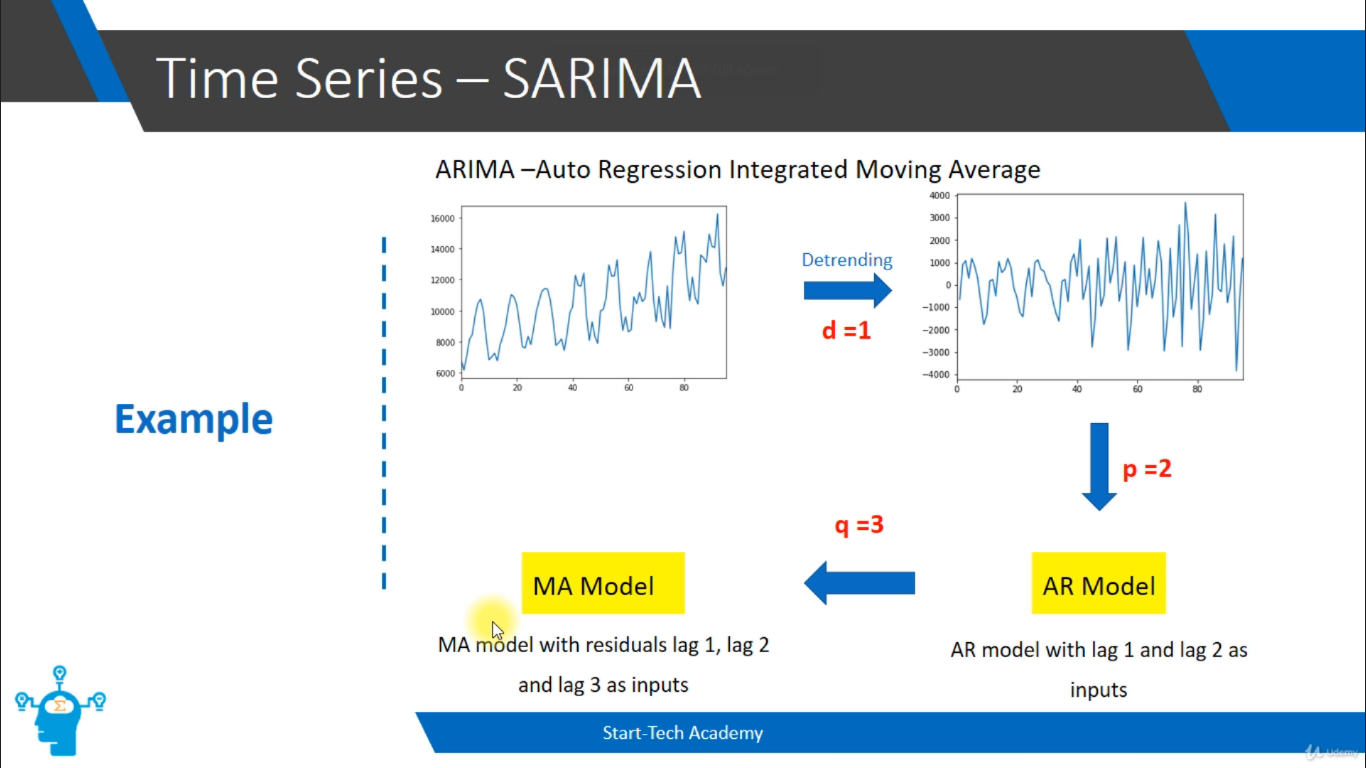

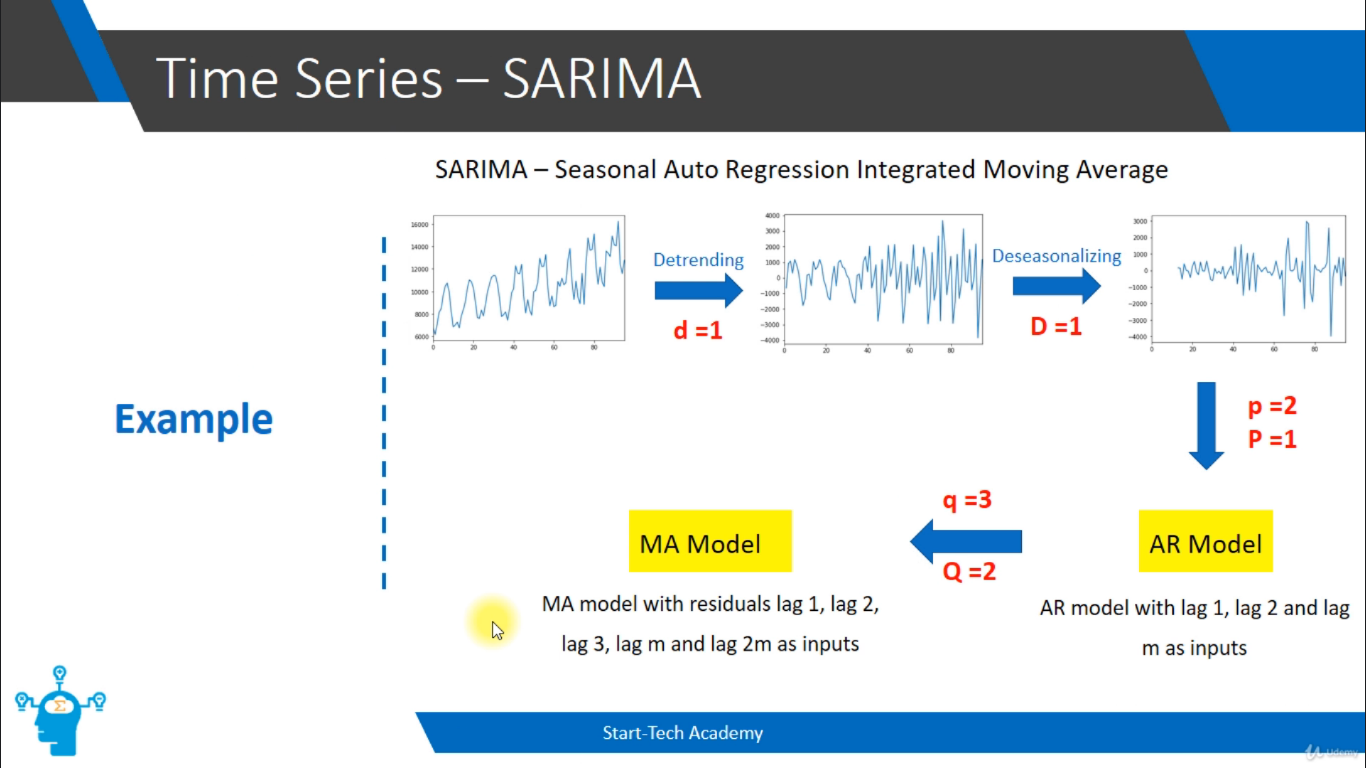

First, after removing the trend, we will do differencing again on this data. For differencing, we will use lag m = 12 (yearly seasonality) value and we will do it once because we have said D = 1. If you need to do double differencing for removing seasonality, the D = 2. But that is rarely the case. Usually D = 1. 

After being different thing to remove the seasonality, we will be making the AR model for this. We will be using these two values (p = 2) and we'll be using the lag of seasonal values also. So apart from lag one and lag two values. We'll be using the lag m value. If P = 2, we'll be having two inputs from the seasonality. That is lag m and lag 2m, since m = 12, it will be lag 12 value and lag 24 value.

So this P value will tell how many sales values of previous years are to be taken for the auto regression model.

Similarly, for moving average model, we will take few residuals from the previous seasons as well. So this Q will tell how many residual values of same season are to be taken from the previous years.

And another, an extension of the SARIMA model is **SARIMAX** model, in which, apart from the normal SARIMA model, which is build on the times series, you also import some **exogenous variables**. 

Exogenous variables will be other variables other than the variable to be predicted.

In this case, such exogenous variables can also be easily added to our model. We just need to specify additional parameter which will contain this exogenous dataset. Only thing that we must note is that in this additional dataset date time should be kept as an index and not as a separate column.

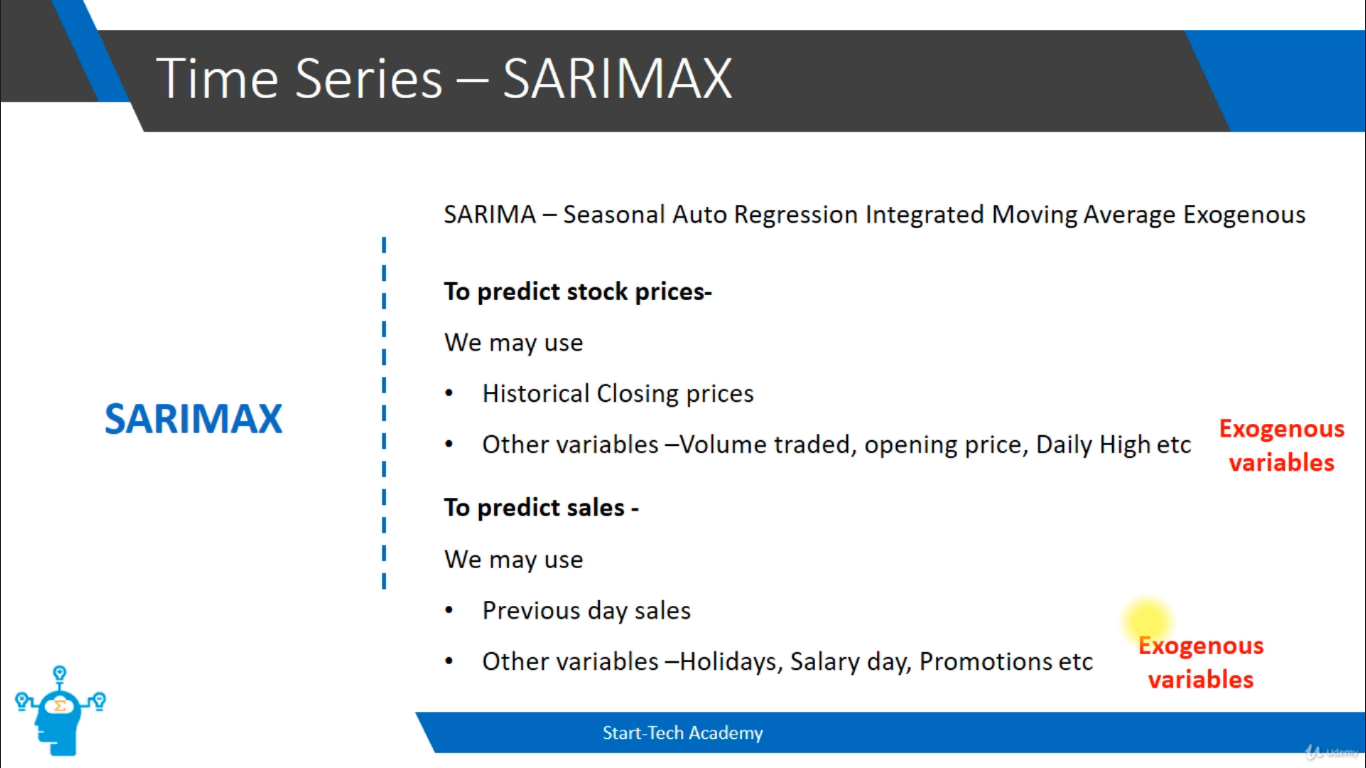

Now, one of the limitation of ARIMA is that it can only handle trend in your data. If your data have seasonality, you first have to difference it and then use ARIMA model on difference data. To overcome this limitation, we have SARIMA model where we include both grand and seasonality while modeling.

in SARIMA you have to provide seven different parameters. First you have to provide p, d, q for trend data and then P, D, Q, and M for the seasonal data.

In [40]:
df = pd.read_csv('./data/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [41]:
df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

In [42]:
df.tail()

Month  MilesMM
91 1970-08-01    14057
92 1970-09-01    16234
93 1970-10-01    12389
94 1970-11-01    11595
95 1970-12-01    12772

In [43]:
df.index = df['Month']

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

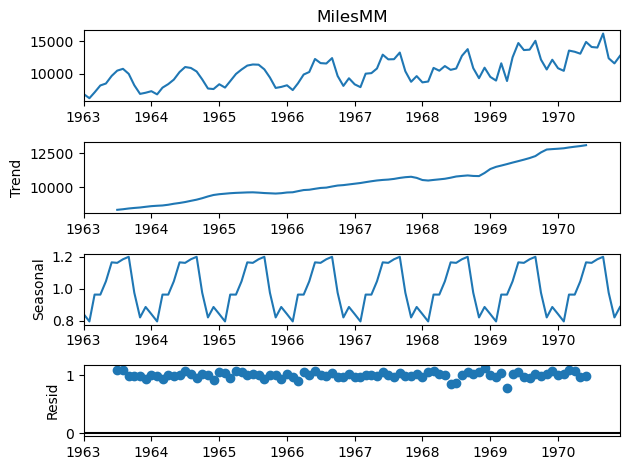

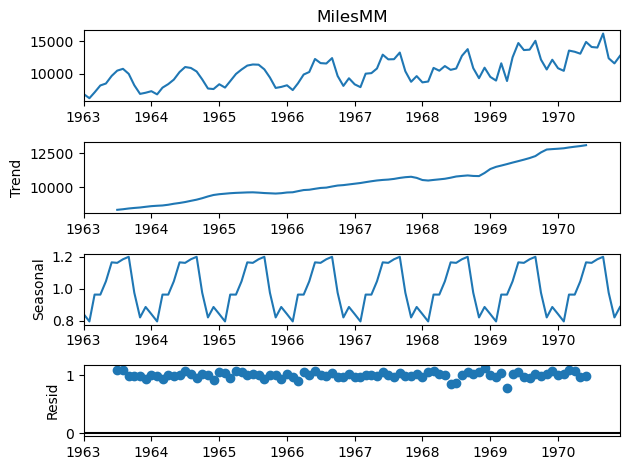

In [45]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

You can see that the seasonality varies from 0.8 to 1.2. That's mean if we are using multiplicative model, there is a change of 20 percent due to seasonality. And that's huge. So we can say that our data have high seasonality.

We can find from the graph that the d = 1 and m = 12. 

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model = SARIMAX(df['MilesMM'], order=(5, 1, 3), seasonal_order=(1, 1, 1, 12))

/home/siamak/anaconda3/envs/ts/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/siamak/anaconda3/envs/ts/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
model_fit = model.fit()

/home/siamak/anaconda3/envs/ts/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/siamak/anaconda3/envs/ts/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12535D+00    |proj g|=  3.45078D-01

At iterate    5    f=  6.96597D+00    |proj g|=  5.45169D-02

At iterate   10    f=  6.95862D+00    |proj g|=  1.47073D-02

At iterate   15    f=  6.94414D+00    |proj g|=  5.82853D-02

At iterate   20    f=  6.93432D+00    |proj g|=  1.90298D-02

At iterate   25    f=  6.93391D+00    |proj g|=  1.47463D-03

At iterate   30    f=  6.93390D+00    |proj g|=  1.86619D-03

At iterate   35    f=  6.93388D+00    |proj g|=  3.62129D-03

At iterate   40    f=  6.93386D+00    |proj g|=  1.65932D-03

At iterate   45    f=  6.93379D+00    |proj g|=  2.03516D-03

At iterate   50    f=  6.92967D+00    |proj g|=  3.49972D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/siamak/anaconda3/envs/ts/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Month'>

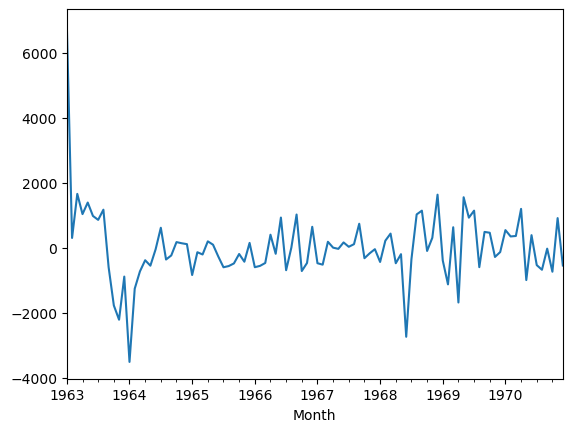

In [49]:
residuals.plot()

You can see that the residuals are centred around zero and there is no trend or seasonality in the residuals. This residuals are like a white noise and we can say that our model extracted all the information from this dataset.

In [52]:
output = model_fit.forecast(12)

In [53]:
output

1971-01-01    11475.896069
1971-02-01    11153.502300
1971-03-01    13669.509349
1971-04-01    12647.368334
1971-05-01    14338.994360
1971-06-01    15786.400730
1971-07-01    14979.200026
1971-08-01    15362.174645
1971-09-01    16962.867549
1971-10-01    13682.105221
1971-11-01    12426.901265
1971-12-01    13730.128736
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

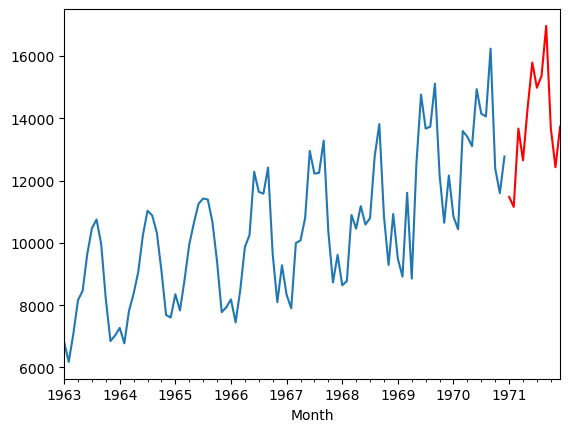

In [55]:
df['MilesMM'].plot()
output.plot(color='red')

Now, just like ARIMA, we have .predict function. In .predict function, we have to provide a start date and end date. And if we don't provide any date, it will give prediction values for all the values that are available in your data.

In [58]:
yhat = model_fit.predict()

In [59]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5872.059263
1963-03-01    5422.255546
1963-04-01    7122.548182
1963-05-01    7067.360265
Freq: MS, Name: predicted_mean, dtype: float64

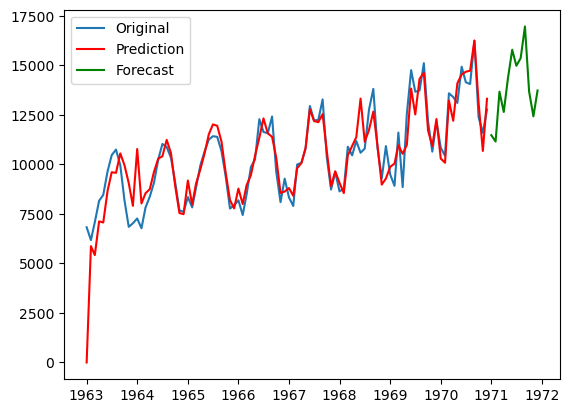

In [61]:
plt.plot(df['MilesMM'], label='Original')
plt.plot(yhat, color='red', label='Prediction')
plt.plot(output, color='green', label='Forecast')
plt.legend()
plt.show()

# Stationary

We have been mentioning about some models which are applicable on only time series data, which does **not** have **trend** and **seasonality**, but there is a special term for such series. Such series are called **stationary Series**.

Well, technically, a **stationary time series** is one whose **statistical properties**, such as mean variance, autocorrelation, etc., are all **constant over time**.

For most **business and economic activities**, the time series data is **rarely stationary**.

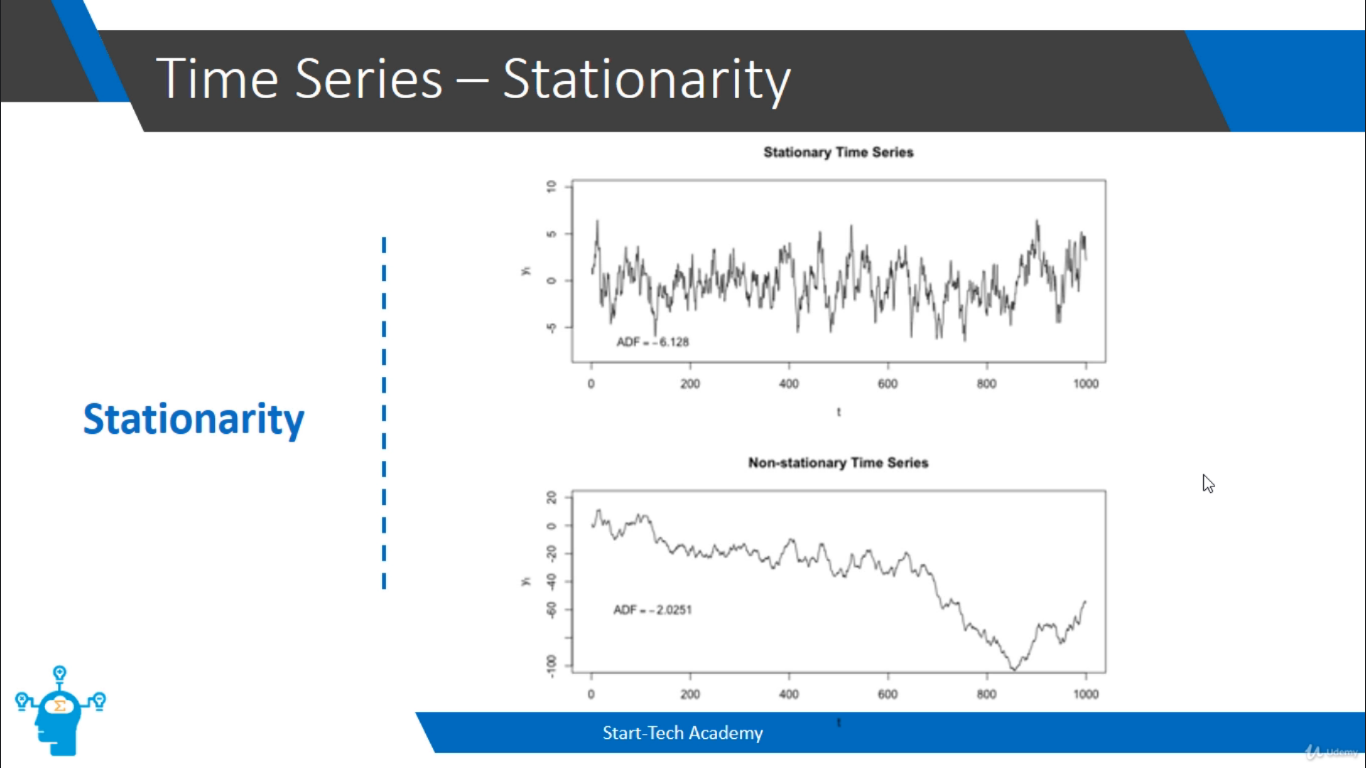

So since the **mean** is **changing over time**, this time series is **not stationary**. And we **cannot apply models** such as AR or ARIMA to forecast it. So to make a time series **stationary**, we just need to use **differencing**. 

We will use **differencing** to **remove trend** and **seasonality** both and for most purposes, we will be able to use our models on the **resulting series**. Else you can simply use models such as **SARIMA** or **SARIMAX**, which **handles seasonality** and **trend**.